**Test assignment from the company Thumos** 

Test case №2:

You can find the file in this folder, which contains Linkedin profile scrapes of individuals that were part of an outreach effort. The goal is to get people to purchase a ticket to an event and ultimately join the organization as a member.  Since the same method of profile scraping will be used in the future to identify the best leads, it's important that patterns that exist in the content of the profiles be identified.

The column 'Result' has one of six outcomes for each person:
-Purchased membership: The ideal outcome, bought an event ticket and a membership
-Purchased event: A positive outcome but not ideal
-Approved: They were approved to come to an event but did not purchase
-Sent personal f/u: Conversation was started but ended
-Out of sequence: Conversation was started but ended
-2021 Member: Someone who was a previous member of the organization

In order to better focus outreach efforts in the future, we need to determine which characteristics show a higher probability of purchasing a membership and/or purchasing an event ticket.

Please provide an analysis that identifies what traits, characteristics, patterns, etc. can be used to indicate a higher probability of a positive/ideal outcome and please describe your methodology.



### Data description:
- linkedinProfile - the client's account in linkedin
- Result - the column with the result of the client's action
- description - description in the client's profile
- location - client's location
- company - the name of the client's company
- jobTitle - current position of the client
- jobLocation - the address of the company where the client works
- jobDateRange - the time that the client has already been working for this company
- company2 - the client's previous place of work
- jobTitle2 - the position of the client at the previous place of work
- school - the client's first place of study
- schoolDegree - the client's first academic degree
- schoolDegreeSpec - the specialty that the client studied at the first educational institution
- school2 - the client's second place of study
- schoolDegree2 - the client's second academic degree
- schoolDegreeSpec2 - the specialty that the client studied at the second educational institution


In [1]:
# Importing the libraries that we will need in this project
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [3]:
# We read the data from the csv file into a dataframe , save it to a variable, 
# and study the general information about the table
file_path = 'Linkedin Accounts.xlsx'
data = pd.read_excel(file_path)

In [4]:
data.head()

,linkedinProfile,Result,Other,email,description,headline,location,firstName,lastName,fullName,...,naf5DesFromDropContact,sirenFromDropContact,siretFromDropContact,siretAddressFromDropContact,siretZipFromDropContact,vatFromDropContact,schoolDescription,nbEmployeesFromDropContact,Unnamed: 72,Unnamed: 73
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,Parker@HedgeHogHealth.com,NaN,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",Parker,Lynch,Parker Lynch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Hunter,shachar@badtesting.com,I'm the founder and principal consultant at Ba...,"I believe that high-quality, powerful software...",Dallas-Fort Worth Metroplex,Shachar,Schiff,Shachar Schiff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.linkedin.com/in/gary-lacourt-811b1874,4.Purchased Event,Hunter,gary.lacourt@forevercompanies.com,Serial entrepreneur and business founder. Main...,"Founder and CEO, Forever Companies","Milwaukee, Wisconsin, United States",Gary,LaCourt,Gary LaCourt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 74 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   linkedinProfile               348 non-null    object        
 1   Result                        348 non-null    object        
 2   Other                         191 non-null    object        
 3   email                         216 non-null    object        
 4   description                   278 non-null    object        
 5   headline                      348 non-null    object        
 6   location                      348 non-null    object        
 7   firstName                     348 non-null    object        
 8   lastName                      348 non-null    object        
 9   fullName                      348 non-null    object        
 10  subscribers                   347 non-null    float64       
 11  userId                        28

### Data preprocessing

In [6]:
# Let's check how many gaps there are in our table
data.isna().sum()

linkedinProfile                   0
Result                            0
Other                           157
email                           132
description                      70
headline                          0
location                          0
firstName                         0
lastName                          0
fullName                          0
subscribers                       1
userId                           59
mutualConnectionsText           344
mailFromDropcontact             194
company                           2
companyUrl                       85
jobTitle                          1
jobDescription                  179
jobLocation                     133
jobDateRange                      6
company2                         13
companyUrl2                     112
jobTitle2                        13
jobDescription2                 165
jobDateRange2                    16
school                           20
schoolUrl                        73
schoolDegree                

In [7]:
# Let's count the share of gaps
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
linkedinProfile,0.0
Result,0.0
Other,45.1
email,37.9
description,20.1
headline,0.0
location,0.0
firstName,0.0
lastName,0.0
fullName,0.0


**Conclusion: there are a lot of gaps, but I am glad that there are practically no gaps in the columns Result, location, company, jobTitle, school.**

In [8]:
# Let's check how many explicit duplicates there are in our table
data.duplicated().sum()

0

**Conclusion: no explicit duplicates were found.**

#### Let's check how many implicit duplicates there are in our table

In [9]:
# Let's check for implicit duplicates in the column Result
data['Result'].unique()

array(['5. Purchased Membership', '4.Purchased Event', '3. Approved',
       'Out of Sequence', '2. Sent Personal f/u', '2021 Member'],
      dtype=object)

**Conclusion: the values correspond to the conditions of the task.**

In [10]:
# Let's check for implicit duplicates in the column location
data['location'].value_counts()

Austin, Texas, United States                      14
Madison, Wisconsin, United States                 12
Denver, Colorado, United States                   10
United States                                     10
Dallas-Fort Worth Metroplex                        6
Milwaukee, Wisconsin, United States                6
Boulder, Colorado, United States                   6
Bozeman, Montana, United States                    6
Los Angeles Metropolitan Area                      5
Columbus, Ohio, United States                      5
Greater Minneapolis-St. Paul Area                  5
New York, New York, United States                  5
Greater Milwaukee                                  5
Grand Rapids, Michigan, United States              5
Greater Seattle Area                               4
Minneapolis, Minnesota, United States              4
Austin, Texas Metropolitan Area                    4
Atlanta, Georgia, United States                    4
Atlanta Metropolitan Area                     

**Conclusion: no implicit duplicates were found.**

In [11]:
# Let's check for implicit duplicates in the column jobTitle
data['jobTitle'].value_counts()

Founder                                                                                        39
Co-Founder                                                                                     21
CEO                                                                                            16
Founder & CEO                                                                                  13
Founder and CEO                                                                                13
Owner                                                                                           9
President                                                                                       6
Chief Executive Officer                                                                         6
Co-Founder & CEO                                                                                5
Managing Partner                                                                                5
Founder/CEO         

In [12]:
# Let's try to remove the implicit duplicates
data['jobTitle'] = data['jobTitle'].str.replace('Founder & CEO', 'Founder and CEO').str.replace('CEO & Founder', 'Founder and CEO')
data['jobTitle'] = data['jobTitle'].replace('Chief Executive Officer', 'CEO')
data['jobTitle'] = data['jobTitle'].str.replace('Co-Founder & CEO', 'Co-Founder and CEO')
data['jobTitle'] = data['jobTitle'].str.replace('Founder/CEO', 'Founder and CEO')
data['jobTitle'] = data['jobTitle'].str.replace('CEO & Co-Founder', 'Co-Founder and CEO')
data['jobTitle'] = data['jobTitle'].replace('Chief Operating Officer', 'COO')
data['jobTitle'] = data['jobTitle'].str.replace('CEO and Co-Founder', 'Co-Founder and CEO')
data['jobTitle'] = data['jobTitle'].str.replace('Founder, CEO', 'Founder and CEO')
data['jobTitle'] = data['jobTitle'].str.replace('CEO / Co-Founder', 'Co-Founder and CEO')

In [13]:
# Let's try to remove the implicit duplicates in column jobTitle2
data['jobTitle2'] = data['jobTitle2'].str.replace('Founder & CEO', 'Founder and CEO').str.replace('CEO & Founder', 'Founder and CEO')
data['jobTitle2'] = data['jobTitle2'].replace('Chief Executive Officer', 'CEO')
data['jobTitle2'] = data['jobTitle2'].str.replace('Co-Founder & CEO', 'Co-Founder and CEO')
data['jobTitle2'] = data['jobTitle2'].str.replace('Founder/CEO', 'Founder and CEO')
data['jobTitle2'] = data['jobTitle2'].str.replace('CEO & Co-Founder', 'Co-Founder and CEO')
data['jobTitle2'] = data['jobTitle2'].replace('Chief Operating Officer', 'COO')
data['jobTitle2'] = data['jobTitle2'].str.replace('CEO and Co-Founder', 'Co-Founder and CEO')
data['jobTitle2'] = data['jobTitle2'].str.replace('Founder, CEO', 'Founder and CEO')
data['jobTitle2'] = data['jobTitle2'].str.replace('CEO / Co-Founder', 'Co-Founder and CEO')

In [14]:
# Let's check that the replacements were correct
data['jobTitle'].value_counts()

Founder                                                                                        39
Founder and CEO                                                                                36
CEO                                                                                            22
Co-Founder                                                                                     21
Co-Founder and CEO                                                                             13
Owner                                                                                           9
President                                                                                       6
Managing Partner                                                                                5
Managing Director                                                                               3
COO                                                                                             3
Founding Partner    

In [15]:
# Let's check for implicit duplicates in the column company
data['company'].value_counts()

Apollo Neuroscience, Inc.                                        2
Nalu Board Co.                                                   2
Foothold                                                         2
Falcon Fulfillment                                               2
BestSelf Co.                                                     1
Tenacity Cloud                                                   1
No Barriers USA                                                  1
Planetary Design                                                 1
Ojai Energetics                                                  1
Ecosomatics LLC                                                  1
Viewability                                                      1
Ozone Films | A Video Production Agency                          1
Revive Hemp Industries                                           1
Revival Development Services                                     1
SHE-Suite Boutique                                            

**Conclusion: no implicit duplicates were found.**

In [16]:
# Let's check for implicit duplicates in the column school
data['school'].value_counts()

The Ohio State University                                                          7
Montana State University-Bozeman                                                   6
University of Wisconsin-Madison                                                    6
University of Michigan                                                             5
Michigan State University                                                          4
Harvard Business School                                                            4
Indiana University Bloomington                                                     3
University of Pittsburgh                                                           3
Western Michigan University                                                        3
Hope College                                                                       3
University of Minnesota - Carlson School of Management                             3
University of San Francisco                                      

**Conclusion: no implicit duplicates were found.**

In [17]:
# Let's check for implicit duplicates in the column Other
data['Other'].value_counts()

Hunter     142
Hollis      45
Lovitch      3
Janis        1
Name: Other, dtype: int64

**Conclusion: no implicit duplicates were found. Apparently, managers who worked with clients are represented here.**

In [18]:
# Let's check for implicit duplicates in the column birthday
data['birthday_date'] = pd.to_datetime(data['birthday'], format='%Y-%b-%d')
data['birthday_date'].value_counts()

2023-05-24    3
2023-06-11    3
2023-02-14    2
2023-03-11    2
2023-09-21    2
2023-04-22    2
2023-06-08    2
2023-10-18    2
2023-05-29    2
2023-10-14    2
2023-04-17    2
2023-12-01    2
2023-07-06    2
2023-03-29    1
2023-02-23    1
2023-09-28    1
2023-12-30    1
2023-08-14    1
2023-10-04    1
2023-08-03    1
2023-04-29    1
2023-05-30    1
2023-04-09    1
2023-03-01    1
2023-04-01    1
2023-01-23    1
2023-09-25    1
2023-12-27    1
2023-05-21    1
2023-03-17    1
2023-05-18    1
2023-07-19    1
2023-01-31    1
2023-03-03    1
2023-12-07    1
2023-06-21    1
2023-11-26    1
2023-11-09    1
2023-03-23    1
2023-04-23    1
2023-06-24    1
2023-01-15    1
2023-10-26    1
2023-12-05    1
2023-05-15    1
2023-07-20    1
2023-06-23    1
2023-07-04    1
2023-08-04    1
2023-09-04    1
2023-07-21    1
2023-11-22    1
2023-11-08    1
2023-12-26    1
2023-08-18    1
2023-07-10    1
2023-12-12    1
2023-06-26    1
2023-05-12    1
2023-11-14    1
2023-06-29    1
2023-04-02    1
2023-04-

**Conclusion: For some reason, all clients are born in 2023, apparently there is some kind of error in the data. Accordingly, it is not possible to correctly analyze the dependence of the age of clients and the probability of performing targeted actions.**

In [19]:
data['civilityFromDropContact'].value_counts()

Mr     214
Mrs     63
Name: civilityFromDropContact, dtype: int64

**Conclusion: no implicit duplicates were found, the clients are divided into 2 genders -male and female.**

##  Exploratory analysis, part 1

### Description of the methodology for identifying potential customers
In my opinion, in order to identify potential customers, we need to focus on the following characteristics:
- client's location - column location
- current position of the client - column jobTitle
- age of the client - the birthday column could help here, but apparently incorrect data is in it
- gender of the client - column civilityFromDropContact
- specialty in which the client studied, because it characterizes his interests and hobbies - column schoolDegreeSpec
- scientific degree of the client - column schoolDegree
- field of activity of the company in which the client works - column jobDescription
- client's work experience - column jobDateRange

We will try to categorize each characteristic and calculate the percentage of probability of performing target actions for each category within the characteristic.

**In my opinion, the target results should be considered together. Therefore, we will create a new result_new column, which will have the value True if one of the two target results is specified in the Result column. Otherwise, the column will be set to False.**

In [20]:
def process_result(value):
    return value in ['5. Purchased Membership', '4.Purchased Event']

data['result_new'] = data['Result'].apply(process_result)

data.head()

,linkedinProfile,Result,Other,email,description,headline,location,firstName,lastName,fullName,...,siretFromDropContact,siretAddressFromDropContact,siretZipFromDropContact,vatFromDropContact,schoolDescription,nbEmployeesFromDropContact,Unnamed: 72,Unnamed: 73,birthday_date,result_new
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,Parker@HedgeHogHealth.com,NaN,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",Parker,Lynch,Parker Lynch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-15,True
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Hunter,shachar@badtesting.com,I'm the founder and principal consultant at Ba...,"I believe that high-quality, powerful software...",Dallas-Fort Worth Metroplex,Shachar,Schiff,Shachar Schiff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True
4,https://www.linkedin.com/in/gary-lacourt-811b1874,4.Purchased Event,Hunter,gary.lacourt@forevercompanies.com,Serial entrepreneur and business founder. Main...,"Founder and CEO, Forever Companies","Milwaukee, Wisconsin, United States",Gary,LaCourt,Gary LaCourt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True


In [21]:
# Let's check what percentage of the target results are from the total number
round(100 * data['result_new'].mean(), 2)

2.87

**Conclusion: the target actions are only 3% of the total**

#### Let's check which locations customers are more likely to take targeted actions from
Since there are many cities in the table, then categorize by states of America, since it is obvious that most of the customers are located in the USA.

In [22]:
# Let's create a list with the names of American states
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
    'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
    'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
    'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]


In [23]:
# Let's write a function that, if there is a state name in the location column, returns its name.
#  Otherwise, the value will be specified The state could not be determined
def determine_state(location):
    for state in us_states:
        if state in location:
            return state
    else:
        return 'The state could not be determined'

In [24]:
# Let's create a column with the result of the function
data['state'] = data['location'].apply(determine_state)
data.head()

,linkedinProfile,Result,Other,email,description,headline,location,firstName,lastName,fullName,...,siretAddressFromDropContact,siretZipFromDropContact,vatFromDropContact,schoolDescription,nbEmployeesFromDropContact,Unnamed: 72,Unnamed: 73,birthday_date,result_new,state
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,Ohio
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,Michigan
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,Parker@HedgeHogHealth.com,NaN,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",Parker,Lynch,Parker Lynch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-15,True,Michigan
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Hunter,shachar@badtesting.com,I'm the founder and principal consultant at Ba...,"I believe that high-quality, powerful software...",Dallas-Fort Worth Metroplex,Shachar,Schiff,Shachar Schiff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,The state could not be determined
4,https://www.linkedin.com/in/gary-lacourt-811b1874,4.Purchased Event,Hunter,gary.lacourt@forevercompanies.com,Serial entrepreneur and business founder. Main...,"Founder and CEO, Forever Companies","Milwaukee, Wisconsin, United States",Gary,LaCourt,Gary LaCourt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,Wisconsin


In [25]:
# For each state, we will calculate the number of mentions in the table
states = data.pivot_table(index='state',
                        values='Result',
                        aggfunc='count').reset_index()
states.sort_values(by='Result', ascending=False)

,state,Result
30,The state could not be determined,94
34,Wisconsin,38
12,Michigan,26
1,Colorado,26
29,Texas,23
22,Ohio,19
4,Georgia,17
0,California,16
14,Montana,15
13,Minnesota,11


**Unfortunately, 94 locations could not be identified, they will have to be removed from consideration.**

In [26]:
# Let's leave only the states that have been identified and calculate the probability of a target action for them
data_by_states = data.query('state != "The state could not be determined"')
states_correct = data_by_states.pivot_table(index='state',
                                            values=['Result', 'result_new'],
                                            aggfunc={'Result': 'count', 'result_new': 'mean'}).reset_index()
states_correct['result_new'] = round(100 * states_correct['result_new'], 3)
states_correct.query('result_new > 0').sort_values(by='result_new', ascending=False)

,state,Result,result_new
12,Michigan,26,11.538
13,Minnesota,11,9.091
22,Ohio,19,5.263
33,Wisconsin,38,5.263


**We can confidently say that only residents of the states Michigan, Minnesota, Ohio, Wisconsin performed targeted actions. This conclusion is confirmed by the fact that all four of these states are located next to each other.**

#### Let's check which positions are presented in the tables and clients with which positions are more likely to commit targeted actions

In [27]:
data['jobTitle'].unique()

array(['CEO', 'President and Illustrator', 'Founder and Principal',
       'Founder and CEO', 'Managing Partner', 'Owner', 'Founder',
       'Co-Founder', 'Chief Strategy & Product Officer',
       'Co-Founder and CEO of Hello Beverages', 'Co-Founder & CTO',
       'Seller Marketing Manager @ Etsy', 'Chief Instigator / Co-Founder',
       'Founder and Chief Executive Officer', 'Cofounder & CTO',
       'Owner Narrative Shift (fka Blue Heeler Arts)',
       'Counselor of Laws', 'Founder | Systems Engineer',
       'Automation Engineer, Founder and CEO', 'President',
       'Art Director, Designer, Pixel Pusher', 'CEO and President', 'COO',
       'Director Of Operations', 'Co-Founder and CEO',
       'Audiobook Narrator',
       'Story Teller, Educator & Creative Brand Marketing Guide', 'Host',
       'Account Manager', 'Director Of Engineering',
       'Executive Vice President', 'Owner/Trainer',
       'Customer Service Representative', 'Business Owner',
       'Ocean Operations Manag

**We see that the table shows a large number of essentially identical positions, which are called a little differently, apparently depending on the structure of the company. To categorize them, we will use the elbow method, which will divide all the values from the column into clusters. Next, for each cluster, we calculate the probability of performing target actions.**

In [28]:
# First, for the elbow method to work correctly, we will leave only those rows where there are no gaps in the jobTitle column
data_by_job = data.dropna(subset=['jobTitle'])

In [29]:
# Let's save the values from the column jobTitle to a separate variable
texts = data_by_job['jobTitle']

In [30]:
# Let's delete the stop words, split the text into vectors and calculate how often each word occurs
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

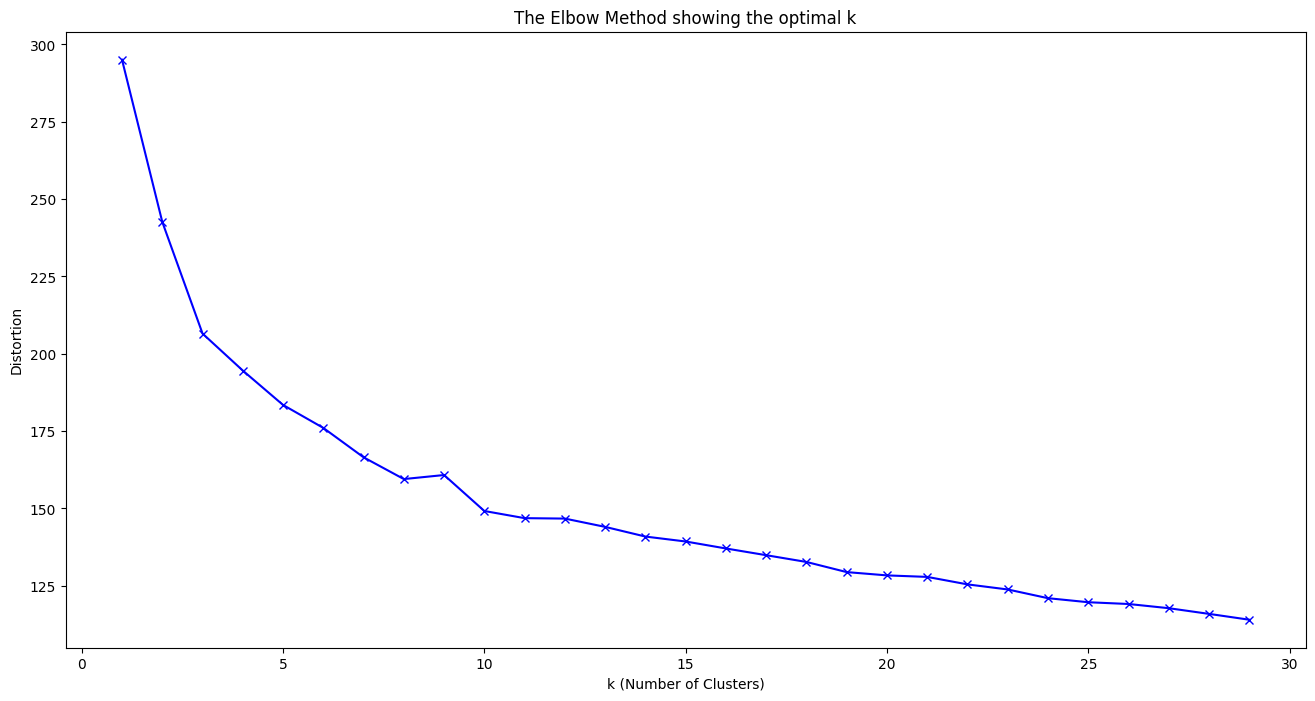

In [31]:
# Let's perform the elbow method for our text and build a graph that will help determine the optimal number of clusters
distortions = []
K = range(1, 30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Conclusion: the optimal number of clusters is 10.**

In [32]:
# Let's create a new column in the table, which will specify the cluster number corresponding to the value from the column jobTitle
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_by_job['cluster_label'] = kmeans.fit_predict(X)

data_by_job.head()

,linkedinProfile,Result,Other,email,description,headline,location,firstName,lastName,fullName,...,siretZipFromDropContact,vatFromDropContact,schoolDescription,nbEmployeesFromDropContact,Unnamed: 72,Unnamed: 73,birthday_date,result_new,state,cluster_label
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,Ohio,8
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,Michigan,0
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,Parker@HedgeHogHealth.com,NaN,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",Parker,Lynch,Parker Lynch,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-15,True,Michigan,8
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Hunter,shachar@badtesting.com,I'm the founder and principal consultant at Ba...,"I believe that high-quality, powerful software...",Dallas-Fort Worth Metroplex,Shachar,Schiff,Shachar Schiff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,The state could not be determined,9
4,https://www.linkedin.com/in/gary-lacourt-811b1874,4.Purchased Event,Hunter,gary.lacourt@forevercompanies.com,Serial entrepreneur and business founder. Main...,"Founder and CEO, Forever Companies","Milwaukee, Wisconsin, United States",Gary,LaCourt,Gary LaCourt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,Wisconsin,1


**After studying each cluster, it was decided to assign them the following names:**
- President/Vice-President
- Founder and CEO
- Owner
- Founder/Co-founder
- Managing Partner
- Others
- Chief Marketing/Strategy/Operating Officer
- CEO
- Founder and Principal

In [33]:
# Let's create a function that, depending on the cluster number, assigns its name
def txt_tags(row):
  if row == 0:
     return 'President/Vice-President'
  if row == 1:
     return 'Founder and CEO'
  if row == 2:
     return 'Owner'
  if row == 3:
     return 'Founder/Co-founder'
  if row == 4:
     return 'Managing Partner'
  if row == 5:
     return 'Others'
  if row == 6:
     return 'Chief Marketing/Strategy/Operating Officer'
  if row == 7:
     return 'Art/Creative/Executive Director'
  if row == 8:
     return 'CEO'
  if row == 9:
    return 'Founder and Principal'

# Let's create a new column with the result of the function
data_by_job['job_name'] = data_by_job['cluster_label'].apply(txt_tags)

In [34]:
# Now, for each category of position, we will calculate the number of mentions in the table 
# and the percentage of probability of performing targeted actions
jobs = data_by_job.pivot_table(index='job_name',
                               values=['Result', 'result_new'],
                               aggfunc={'Result': 'count', 'result_new': 'mean'}).reset_index()

jobs['result_new'] = round(jobs['result_new'] * 100, 3)
jobs

,job_name,Result,result_new
0,Art/Creative/Executive Director,25,0.000
1,CEO,22,13.636
2,Chief Marketing/Strategy/Operating Officer,17,0.000
3,Founder and CEO,55,1.818
4,Founder and Principal,4,25.000
5,Founder/Co-founder,62,3.226
6,Managing Partner,17,5.882
7,Others,108,0.000
8,Owner,17,5.882
9,President/Vice-President,20,5.000


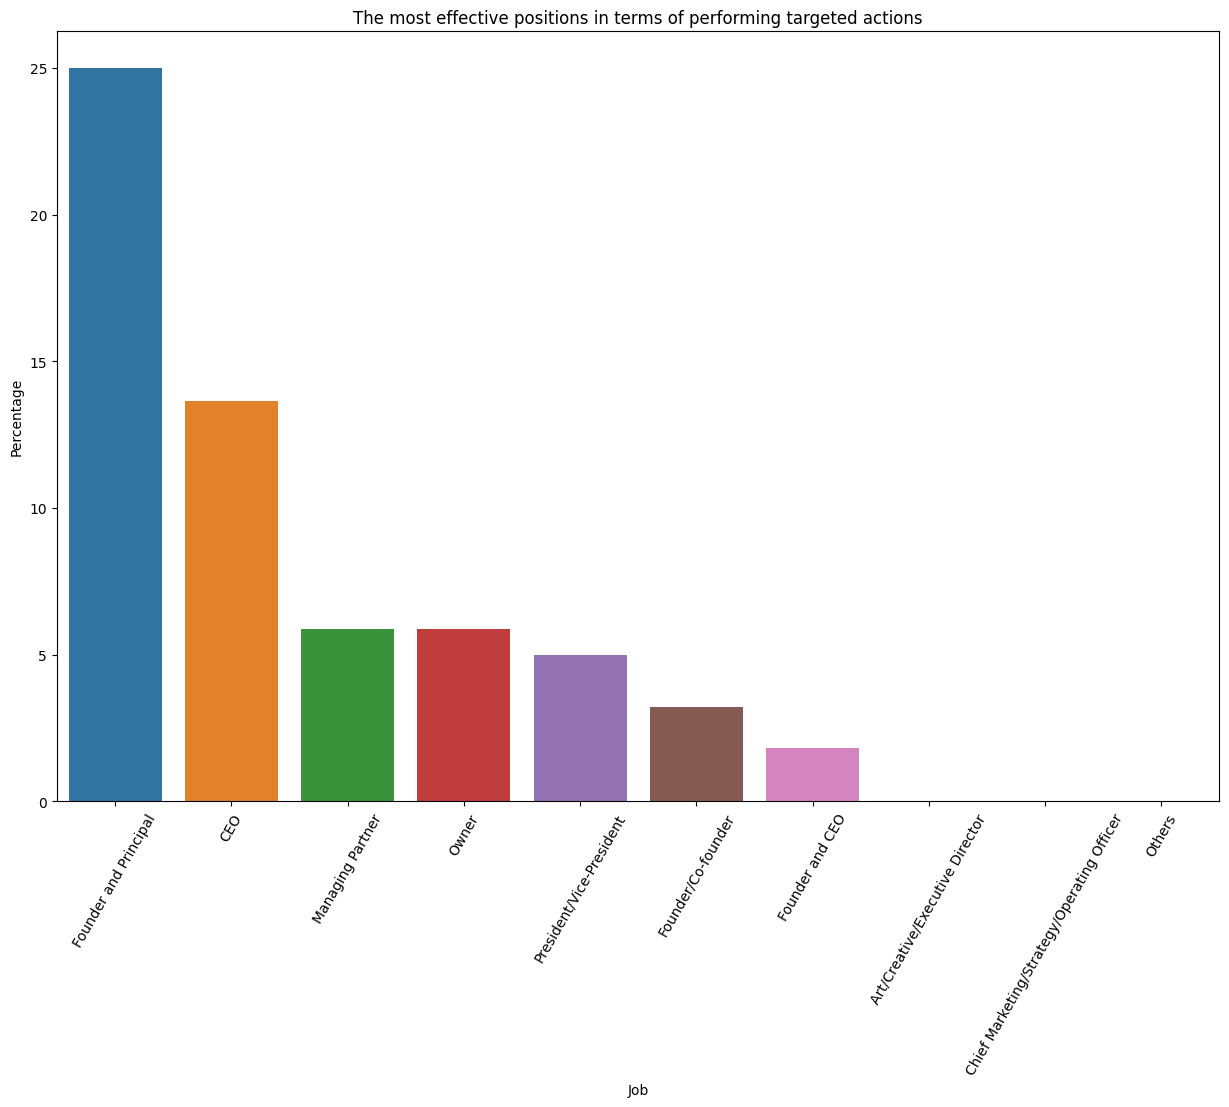

In [35]:
# Visualize the received data
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="job_name", y="result_new", data=jobs.sort_values(by='result_new', ascending=False))
plt.xlabel('Job')
plt.ylabel('Percentage')
plt.title('The most effective positions in terms of performing targeted actions')
plt.xticks(rotation=60)
plt.show();

**Conclusion: we can say that People holding positions "Founder and Principal" and "CEO" are much more likely to perform targeted actions. But we also have to take into account that people with the position of Founder and Principal are found in our table only 4 times, which is extremely small and can distort our conclusions.**

#### Let's check which genders are presented in the tables and clients with which genders are more likely to commit targeted actions

In [36]:
# For each gender, we calculate the number of mentions in the table and the probability of completing the target actions
gender = data.pivot_table(index='civilityFromDropContact',
                               values=['Result', 'result_new'],
                               aggfunc={'Result': 'count', 'result_new': 'mean'}).reset_index()

gender['result_new'] = round(gender['result_new'] * 100, 3)
gender

,civilityFromDropContact,Result,result_new
0,Mr,214,4.673
1,Mrs,63,0.000


**Conclusion: Only men have performed targeted actions.**

#### Let's check which specialities are presented in the tables and clients with which specialities are more likely to commit targeted actions

**By analogy with the column jobTitle, using the elbow method, we divide all specialties into clusters. Next, we will assign a name to each cluster and calculate for each cluster the number of mentions in the table and the probability of performing targeted actions.**

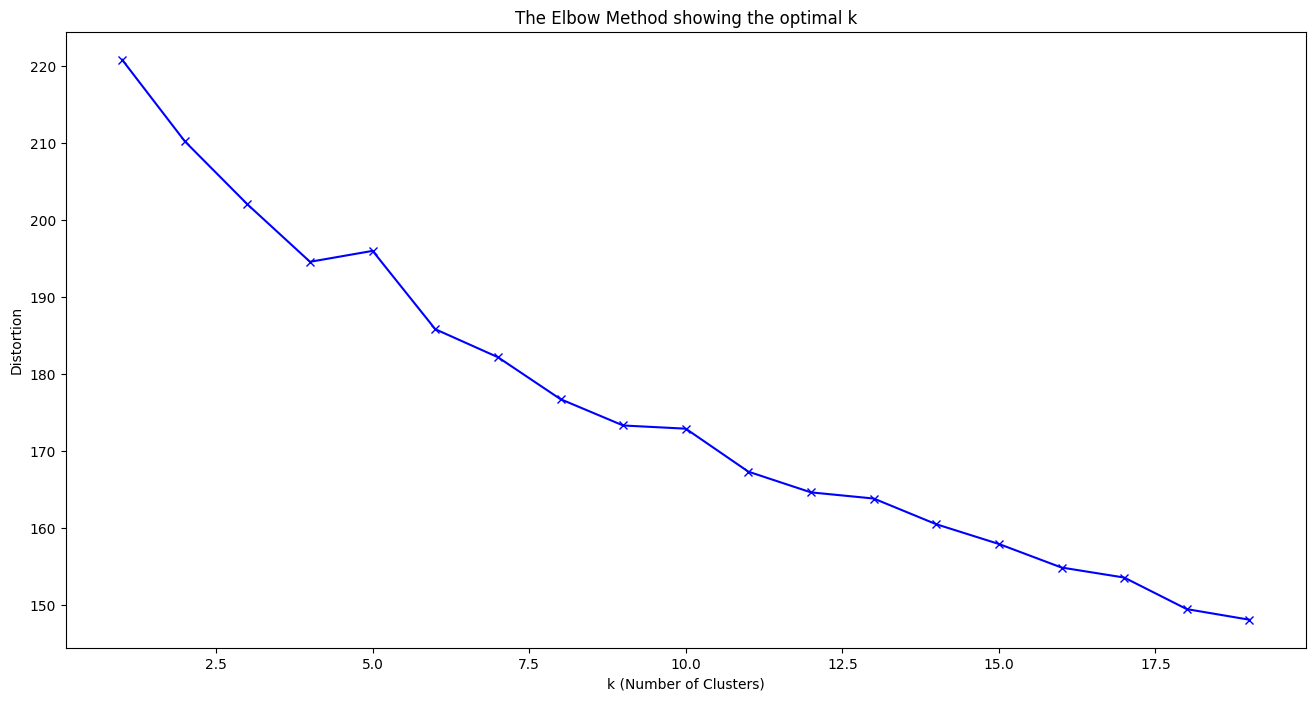

In [37]:
data_by_speciality = data.dropna(subset=['schoolDegreeSpec'])
texts = data_by_speciality['schoolDegreeSpec']
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [38]:
optimal_k = 15
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_by_speciality['cluster_label'] = kmeans.fit_predict(X)

data_by_speciality.head()

,linkedinProfile,Result,Other,email,description,headline,location,firstName,lastName,fullName,...,siretZipFromDropContact,vatFromDropContact,schoolDescription,nbEmployeesFromDropContact,Unnamed: 72,Unnamed: 73,birthday_date,result_new,state,cluster_label
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,Ohio,1
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,Michigan,8
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,Parker@HedgeHogHealth.com,NaN,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",Parker,Lynch,Parker Lynch,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-15,True,Michigan,8
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Hunter,shachar@badtesting.com,I'm the founder and principal consultant at Ba...,"I believe that high-quality, powerful software...",Dallas-Fort Worth Metroplex,Shachar,Schiff,Shachar Schiff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,The state could not be determined,4
5,https://www.linkedin.com/in/lyle-stoflet-38a07ab8,4.Purchased Event,Hunter,stoflet@stratusindustries.com,Whatâ€™s to love about our design products?\n\...,Managing Partner at Stratus Industries / Gear ...,"Milwaukee, Wisconsin, United States",Lyle,Stoflet,Lyle Stoflet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,Wisconsin,4


In [39]:
def txt_tags(row):
  if row == 0:
     return 'Others'
  if row == 1:
     return 'Marketing'
  if row == 2:
     return 'Entrepreneurship'
  if row == 3:
     return 'Economics'
  if row == 4:
     return 'Engineering'
  if row == 5:
     return 'International Business'
  if row == 6:
     return 'Computer Science'
  if row == 7:
     return 'Communication and Media'
  if row == 8:
     return 'Others'
  if row == 9:
    return 'Medicine'
  if row == 10:
    return 'Communication and Media'
  if row == 11:
    return 'Business Administration'
  if row == 12:
    return 'Writing and Literature'
  if row == 13:
    return 'Journalism'
  if row == 14:
    return 'Environment'
    
data_by_speciality['specialty_name'] = data_by_speciality['cluster_label'].apply(txt_tags)
data_by_speciality.head()

,linkedinProfile,Result,Other,email,description,headline,location,firstName,lastName,fullName,...,vatFromDropContact,schoolDescription,nbEmployeesFromDropContact,Unnamed: 72,Unnamed: 73,birthday_date,result_new,state,cluster_label,specialty_name
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,...,NaN,NaN,NaN,NaN,NaN,NaT,True,Ohio,1,Marketing
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,...,NaN,NaN,NaN,NaN,NaN,NaT,True,Michigan,8,Others
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,Parker@HedgeHogHealth.com,NaN,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",Parker,Lynch,Parker Lynch,...,NaN,NaN,NaN,NaN,NaN,2023-05-15,True,Michigan,8,Others
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Hunter,shachar@badtesting.com,I'm the founder and principal consultant at Ba...,"I believe that high-quality, powerful software...",Dallas-Fort Worth Metroplex,Shachar,Schiff,Shachar Schiff,...,NaN,NaN,NaN,NaN,NaN,NaT,True,The state could not be determined,4,Engineering
5,https://www.linkedin.com/in/lyle-stoflet-38a07ab8,4.Purchased Event,Hunter,stoflet@stratusindustries.com,Whatâ€™s to love about our design products?\n\...,Managing Partner at Stratus Industries / Gear ...,"Milwaukee, Wisconsin, United States",Lyle,Stoflet,Lyle Stoflet,...,NaN,NaN,NaN,NaN,NaN,NaT,True,Wisconsin,4,Engineering


In [40]:
speciality = data_by_speciality.pivot_table(index='specialty_name',
                               values=['Result', 'result_new'],
                               aggfunc={'Result': 'count', 'result_new': 'mean'}).reset_index()

speciality['result_new'] = round(speciality['result_new'] * 100, 3)
speciality

,specialty_name,Result,result_new
0,Business Administration,15,0.000
1,Communication and Media,18,0.000
2,Computer Science,12,0.000
3,Economics,12,0.000
4,Engineering,23,8.696
5,Entrepreneurship,8,0.000
6,Environment,7,0.000
7,International Business,14,0.000
8,Journalism,6,16.667
9,Marketing,15,6.667


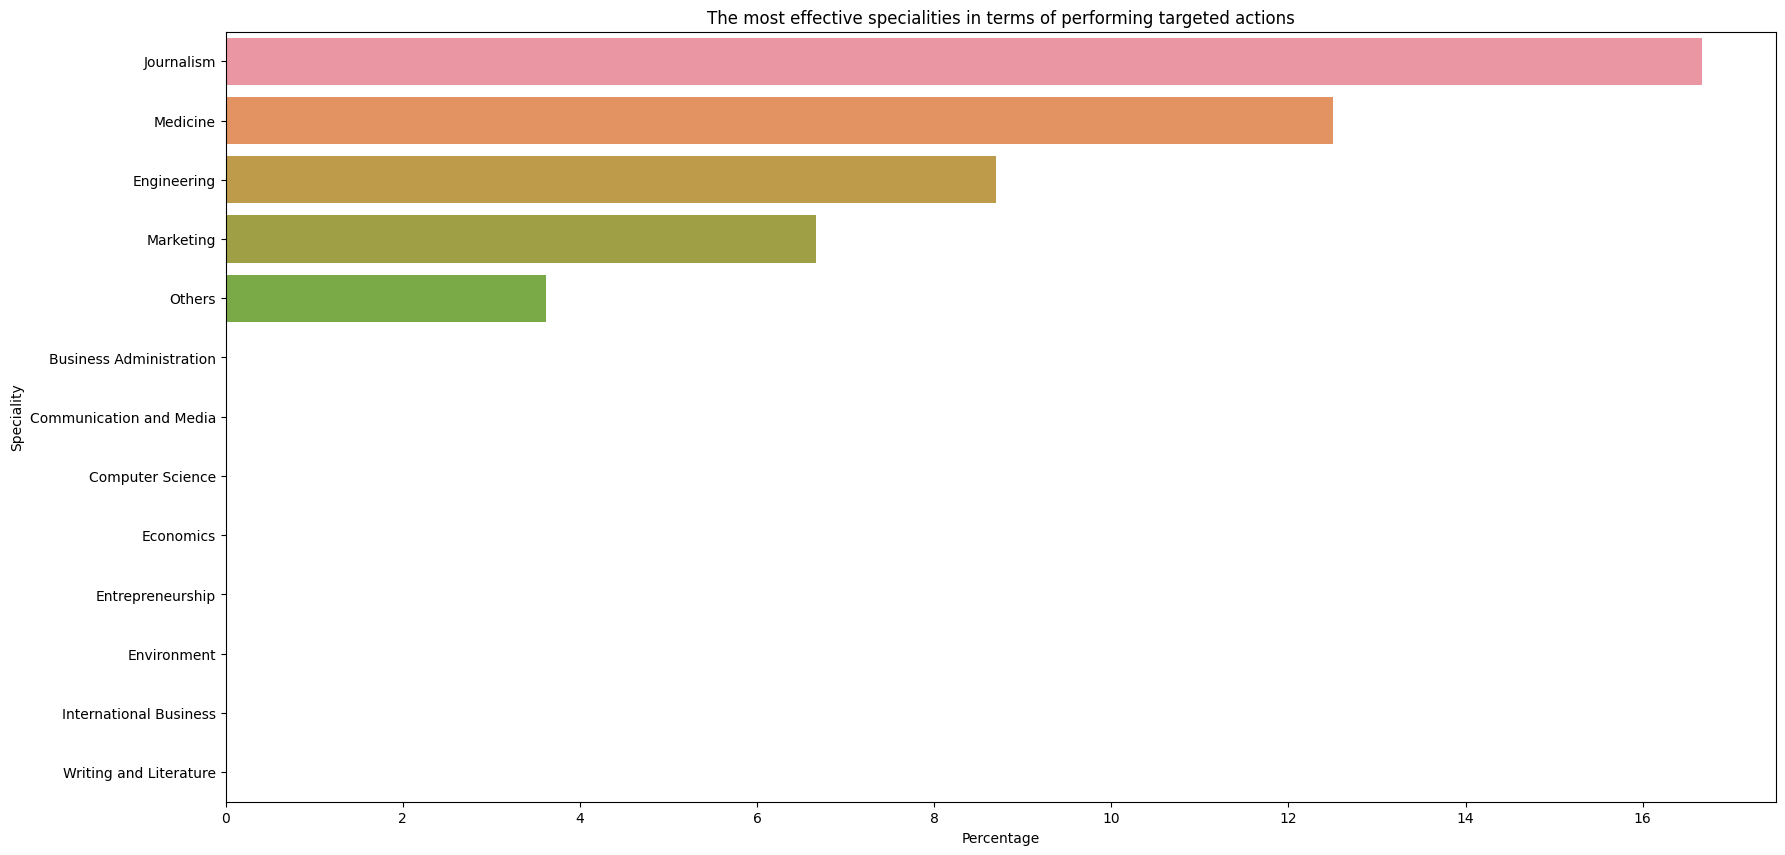

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x="result_new", y="specialty_name", data=speciality.sort_values(by='result_new', ascending=False))
plt.xlabel('Percentage')
plt.ylabel('Speciality')
plt.title('The most effective specialities in terms of performing targeted actions')
plt.show();

**Conclusion: we can say that people who have studied in the directions of Journalism, Medicine, Engineering, Marketing are more likely to commit targeted actions.**

#### Let's check which scientific degrees are presented in the tables and clients with which degrees are more likely to commit targeted actions

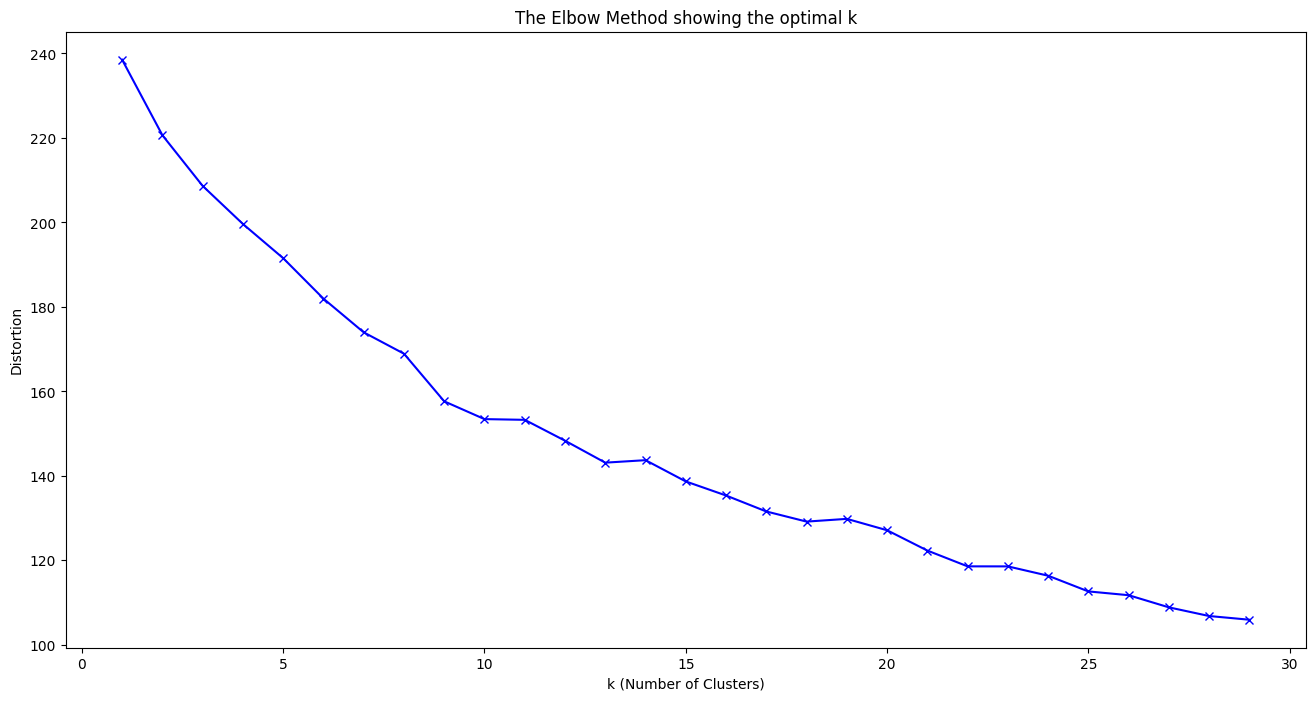

In [42]:
data_by_degree = data.dropna(subset=['schoolDegree'])
texts = data_by_degree['schoolDegree']
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

distortions = []
K = range(1, 30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [43]:
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_by_degree['cluster_label'] = kmeans.fit_predict(X)

data_by_degree.head()

,linkedinProfile,Result,Other,email,description,headline,location,firstName,lastName,fullName,...,siretZipFromDropContact,vatFromDropContact,schoolDescription,nbEmployeesFromDropContact,Unnamed: 72,Unnamed: 73,birthday_date,result_new,state,cluster_label
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,Ohio,0
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,Michigan,9
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,Parker@HedgeHogHealth.com,NaN,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",Parker,Lynch,Parker Lynch,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-15,True,Michigan,0
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Hunter,shachar@badtesting.com,I'm the founder and principal consultant at Ba...,"I believe that high-quality, powerful software...",Dallas-Fort Worth Metroplex,Shachar,Schiff,Shachar Schiff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,The state could not be determined,9
6,https://www.linkedin.com/in/whiteandrewdc,4.Purchased Event,Hunter,NaN,Helping families and individuals reach their G...,Founder at Align & Co.,"Holland, Michigan, United States",Andrew,"White, D.C.","Andrew White, D.C.",...,17400.0,FR17829994987,NaN,NaN,NaN,NaN,2023-09-21,True,Michigan,3


In [44]:
def txt_tags(row):
  if row == 0:
     return 'Others'
  if row == 1:
     return 'Bachelor of Arts'
  if row == 2:
     return 'Master of Business Administration'
  if row == 3:
     return 'PhD'
  if row == 4:
     return "Bachelor's degree"
  if row == 5:
     return 'Master of Business Administration'
  if row == 6:
     return 'Doctor of Law'
  if row == 7:
     return 'Bachelor of Arts'
  if row == 8:
     return 'Bachelor of Science'
  if row == 9:
    return 'Bachelor of Science'
    
data_by_degree['degree_name'] = data_by_degree['cluster_label'].apply(txt_tags)

In [45]:
degrees = data_by_degree.pivot_table(index='degree_name',
                               values=['Result', 'result_new'],
                               aggfunc={'Result': 'count', 'result_new': 'mean'}).reset_index()

degrees['result_new'] = round(degrees['result_new'] * 100, 3)
degrees

,degree_name,Result,result_new
0,Bachelor of Arts,33,0.000
1,Bachelor of Science,51,3.922
2,Bachelor's degree,27,0.000
3,Doctor of Law,7,0.000
4,Master of Business Administration,33,3.030
5,Others,105,3.810
6,PhD,11,9.091


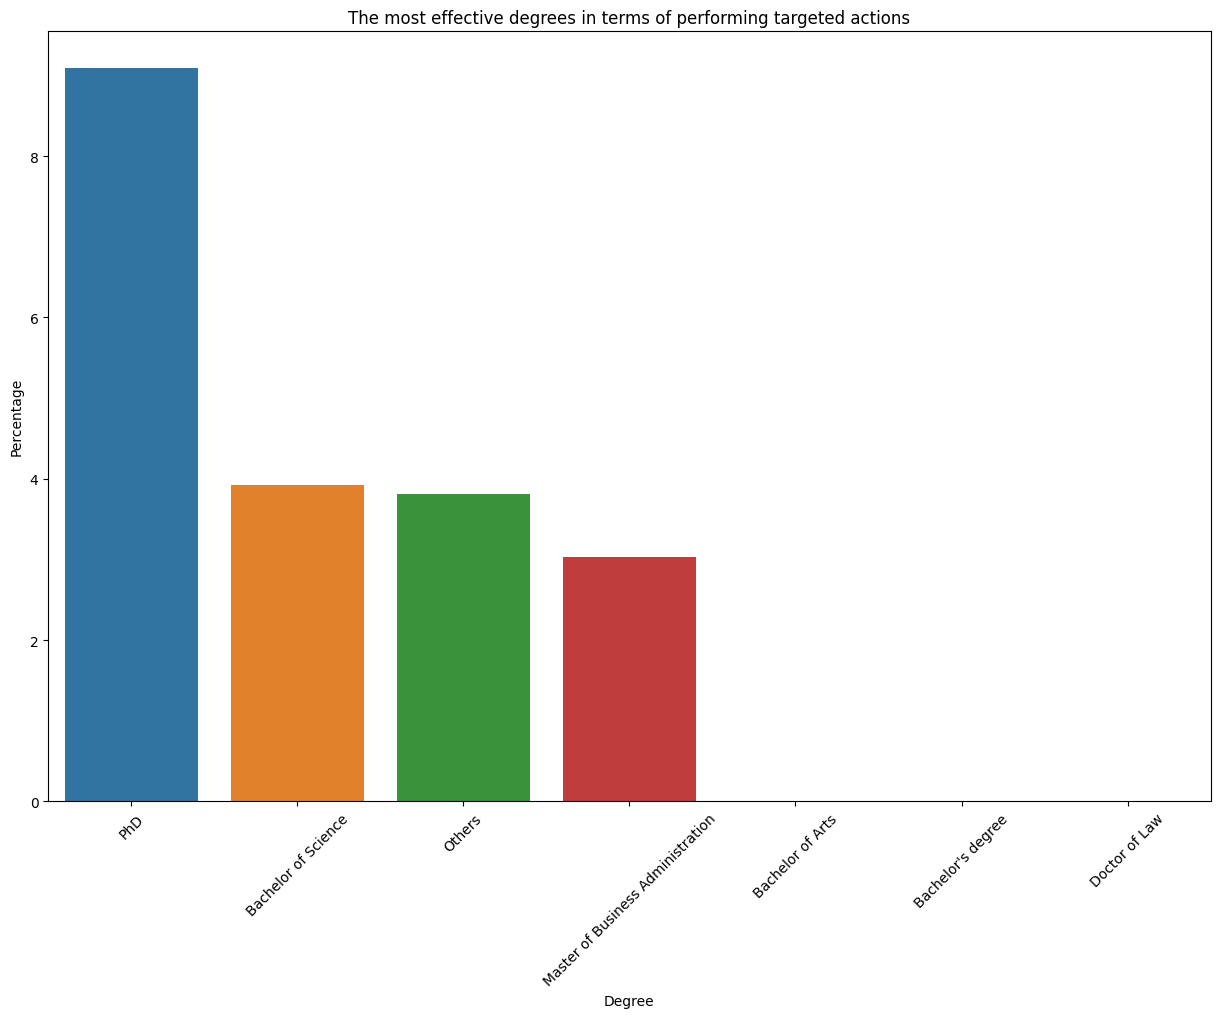

In [46]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="degree_name", y="result_new", data=degrees.sort_values(by='result_new', ascending=False))
plt.xlabel('Degree')
plt.ylabel('Percentage')
plt.title('The most effective degrees in terms of performing targeted actions')
plt.xticks(rotation='45')
plt.show();

**Conclusion: we can say that people with an academic degrees PhD, Bachelor of Science, Master of Business Administration are more likely to commit targeted actions. Unfortunately, it was not possible to identify 105 degrees, which probably distorts the overall picture.**

#### Let's check in which business areas the companies in which our clients work are represented. Let's try to analyze which clients from which areas are more likely to commit targeted actions.

#### Let's check with what work experience the clients are represented in our table. Let's try to analyze the clients with which work experience are more likely to commit targeted actions.

**Select the beginning and end of the work from the column jobDateRange. The "Present" value will be replaced by January 2024. Next, we will find his work experience for each client.**

In [47]:
# We will find the start time for each client
data['start_job'] = data['jobDateRange'].str.extract(r'^(.*?) â')
data.head()

,linkedinProfile,Result,Other,email,description,headline,location,firstName,lastName,fullName,...,siretZipFromDropContact,vatFromDropContact,schoolDescription,nbEmployeesFromDropContact,Unnamed: 72,Unnamed: 73,birthday_date,result_new,state,start_job
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,Ohio,Sep 2010
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,Michigan,Jul 2019
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,Parker@HedgeHogHealth.com,NaN,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",Parker,Lynch,Parker Lynch,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-15,True,Michigan,Nov 2019
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Hunter,shachar@badtesting.com,I'm the founder and principal consultant at Ba...,"I believe that high-quality, powerful software...",Dallas-Fort Worth Metroplex,Shachar,Schiff,Shachar Schiff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,The state could not be determined,Mar 2012
4,https://www.linkedin.com/in/gary-lacourt-811b1874,4.Purchased Event,Hunter,gary.lacourt@forevercompanies.com,Serial entrepreneur and business founder. Main...,"Founder and CEO, Forever Companies","Milwaukee, Wisconsin, United States",Gary,LaCourt,Gary LaCourt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,True,Wisconsin,Aug 2004


In [48]:
# We will find the finish time for each client
data['finish_job'] = data['jobDateRange'].str.extract(r'â€“ (.*)$')
data.head()

,linkedinProfile,Result,Other,email,description,headline,location,firstName,lastName,fullName,...,vatFromDropContact,schoolDescription,nbEmployeesFromDropContact,Unnamed: 72,Unnamed: 73,birthday_date,result_new,state,start_job,finish_job
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,...,NaN,NaN,NaN,NaN,NaN,NaT,True,Ohio,Sep 2010,Present
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,...,NaN,NaN,NaN,NaN,NaN,NaT,True,Michigan,Jul 2019,Present
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,Parker@HedgeHogHealth.com,NaN,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",Parker,Lynch,Parker Lynch,...,NaN,NaN,NaN,NaN,NaN,2023-05-15,True,Michigan,Nov 2019,Present
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Hunter,shachar@badtesting.com,I'm the founder and principal consultant at Ba...,"I believe that high-quality, powerful software...",Dallas-Fort Worth Metroplex,Shachar,Schiff,Shachar Schiff,...,NaN,NaN,NaN,NaN,NaN,NaT,True,The state could not be determined,Mar 2012,Present
4,https://www.linkedin.com/in/gary-lacourt-811b1874,4.Purchased Event,Hunter,gary.lacourt@forevercompanies.com,Serial entrepreneur and business founder. Main...,"Founder and CEO, Forever Companies","Milwaukee, Wisconsin, United States",Gary,LaCourt,Gary LaCourt,...,NaN,NaN,NaN,NaN,NaN,NaT,True,Wisconsin,Aug 2004,Present


In [49]:
data['finish_job'].unique()

array(['Present', nan, 'Feb 2020', 'Dec 2020'], dtype=object)

In [50]:
# Replace the Present value with January 2024
data['finish_job'] = data['finish_job'].replace('Present', 'Jan 2024')

In [51]:
data['finish_job'].unique()

array(['Jan 2024', nan, 'Feb 2020', 'Dec 2020'], dtype=object)

In [52]:
# Let's assume that if only the year is specified in the start_job column, then January of this year is assumed
data['start_job'] = data['start_job'].replace('2005', 'Jan 2005')
data['start_job'] = data['start_job'].replace('2006', 'Jan 2006')
data['start_job'] = data['start_job'].replace('2001', 'Jan 2001')
data['start_job'] = data['start_job'].replace('2018', 'Jan 2018')
data['start_job'] = data['start_job'].replace('2017', 'Jan 2017')
data['start_job'] = data['start_job'].replace('2014', 'Jan 2014')
data['start_job'] = data['start_job'].replace('2021', 'Jan 2021')
data['start_job'] = data['start_job'].replace('2022', 'Jan 2022')
data['start_job'] = data['start_job'].replace('1982', 'Jan 1982')
data['start_job'] = data['start_job'].replace('2008', 'Jan 2008')
data['start_job'] = data['start_job'].replace('2012', 'Jan 2012')
data['start_job'] = data['start_job'].replace('2020', 'Jan 2020')

In [53]:
# For each client, we will find his work experience in years
data['finish_job'] = pd.to_datetime(data['finish_job'], format='%b %Y')
data['start_job'] = pd.to_datetime(data['start_job'], format='%b %Y')

In [54]:
data['years_of_experience'] = (data['finish_job'] - data['start_job']).dt.days / 365
data['years_of_experience'] = round(data['years_of_experience'], 0)

In [55]:
data.head()

,linkedinProfile,Result,Other,email,description,headline,location,firstName,lastName,fullName,...,schoolDescription,nbEmployeesFromDropContact,Unnamed: 72,Unnamed: 73,birthday_date,result_new,state,start_job,finish_job,years_of_experience
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,...,NaN,NaN,NaN,NaN,NaT,True,Ohio,2010-09-01,2024-01-01,13.0
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,...,NaN,NaN,NaN,NaN,NaT,True,Michigan,2019-07-01,2024-01-01,5.0
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,Parker@HedgeHogHealth.com,NaN,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",Parker,Lynch,Parker Lynch,...,NaN,NaN,NaN,NaN,2023-05-15,True,Michigan,2019-11-01,2024-01-01,4.0
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Hunter,shachar@badtesting.com,I'm the founder and principal consultant at Ba...,"I believe that high-quality, powerful software...",Dallas-Fort Worth Metroplex,Shachar,Schiff,Shachar Schiff,...,NaN,NaN,NaN,NaN,NaT,True,The state could not be determined,2012-03-01,2024-01-01,12.0
4,https://www.linkedin.com/in/gary-lacourt-811b1874,4.Purchased Event,Hunter,gary.lacourt@forevercompanies.com,Serial entrepreneur and business founder. Main...,"Founder and CEO, Forever Companies","Milwaukee, Wisconsin, United States",Gary,LaCourt,Gary LaCourt,...,NaN,NaN,NaN,NaN,NaT,True,Wisconsin,2004-08-01,2024-01-01,19.0


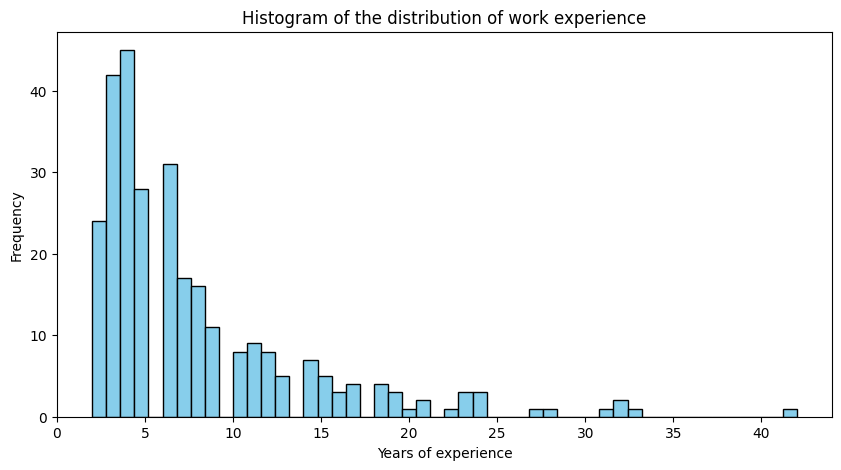

In [56]:
# We visualize the distribution of the working experience of clients
data['years_of_experience'].hist(figsize=[10, 5], bins=50, color='skyblue', edgecolor='black', grid=False)
plt.xlabel('Years of experience')
plt.ylabel('Frequency')
plt.title('Histogram of the distribution of work experience')
plt.show()

**We see that the following categories of experience can be distinguished:**
- Work experience up to 5 years
- Work experience from 5 to 10 years
- Work experience from 10 to 15 years
- More than 15 years of work experience

In [57]:
# Let's create a function that defines the experience category for each client
def categorize(years_of_experience):
    try:
        if 0 <= years_of_experience <= 5:
            return 'Work experience up to 5 years'
        elif 5.01 <= years_of_experience <= 10:
            return 'Work experience from 5 to 10 years'
        elif 10.01 <= years_of_experience <= 15:
            return 'Work experience from 10 to 15 years'
        elif 15.01 <= years_of_experience:
            return 'More than 15 years of work experience'     
    except:
        pass

In [58]:
data['experience'] = data['years_of_experience'].apply(categorize)
data.head()

,linkedinProfile,Result,Other,email,description,headline,location,firstName,lastName,fullName,...,nbEmployeesFromDropContact,Unnamed: 72,Unnamed: 73,birthday_date,result_new,state,start_job,finish_job,years_of_experience,experience
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,mk@aeroscena.com,Mark founded Aeroscena in 2010 with the missio...,Bio-pharmaceutical / functional fragrance,"Cleveland, Ohio, United States",Mark,Kohoot,Mark Kohoot,...,NaN,NaN,NaN,NaT,True,Ohio,2010-09-01,2024-01-01,13.0,Work experience from 10 to 15 years
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,jon@kidsdraw.org,A creative problem solver who can rapidly desi...,Co Founder and CTO - Product Development and M...,"Farmington, Michigan, United States",Jon,Bowerman,Jon Bowerman,...,NaN,NaN,NaN,NaT,True,Michigan,2019-07-01,2024-01-01,5.0,Work experience up to 5 years
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,Parker@HedgeHogHealth.com,NaN,CEO at HedgeHog Health | 2020-2021 Global Educ...,"Royal Oak, Michigan, United States",Parker,Lynch,Parker Lynch,...,NaN,NaN,NaN,2023-05-15,True,Michigan,2019-11-01,2024-01-01,4.0,Work experience up to 5 years
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Hunter,shachar@badtesting.com,I'm the founder and principal consultant at Ba...,"I believe that high-quality, powerful software...",Dallas-Fort Worth Metroplex,Shachar,Schiff,Shachar Schiff,...,NaN,NaN,NaN,NaT,True,The state could not be determined,2012-03-01,2024-01-01,12.0,Work experience from 10 to 15 years
4,https://www.linkedin.com/in/gary-lacourt-811b1874,4.Purchased Event,Hunter,gary.lacourt@forevercompanies.com,Serial entrepreneur and business founder. Main...,"Founder and CEO, Forever Companies","Milwaukee, Wisconsin, United States",Gary,LaCourt,Gary LaCourt,...,NaN,NaN,NaN,NaT,True,Wisconsin,2004-08-01,2024-01-01,19.0,More than 15 years of work experience


In [59]:
# For each category of experience, we calculate the frequency of mentions in the table 
# and the percentage of probability of completing the target actions
experience = data.pivot_table(index='experience',
                               values=['Result', 'result_new'],
                               aggfunc={'Result': 'count', 'result_new': 'mean'}).reset_index()

experience['result_new'] = round(experience['result_new'] * 100, 3)
experience

,experience,Result,result_new
0,More than 15 years of work experience,31,6.452
1,Work experience from 10 to 15 years,34,11.765
2,Work experience from 5 to 10 years,83,0.000
3,Work experience up to 5 years,139,2.878


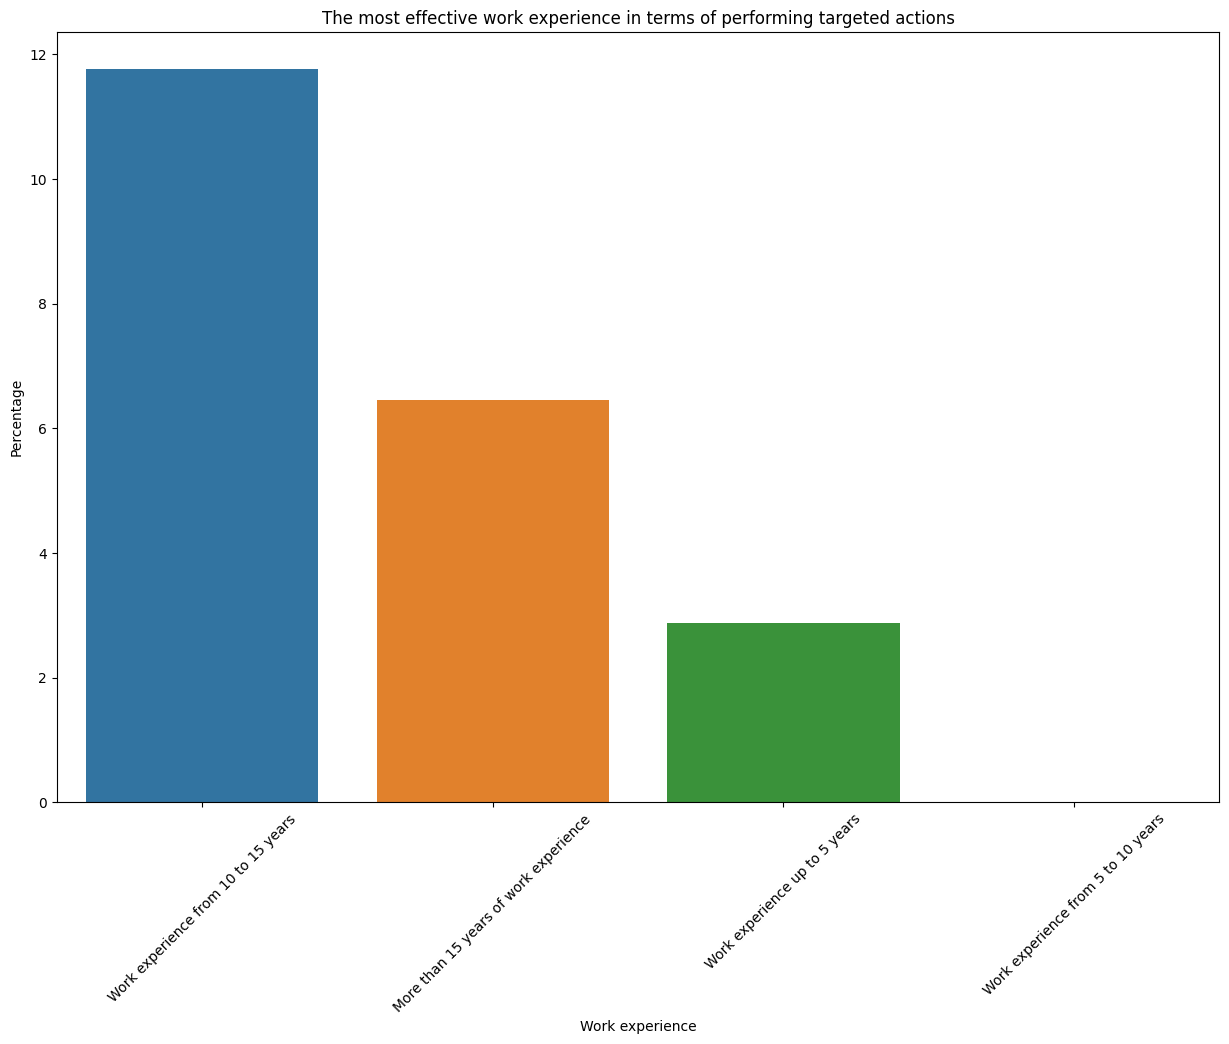

In [60]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="experience", y="result_new", data=experience.sort_values(by='result_new', ascending=False))
plt.xlabel('Work experience')
plt.ylabel('Percentage')
plt.title('The most effective work experience in terms of performing targeted actions')
plt.xticks(rotation='45')
plt.show();

**Conclusion: we can say that people with working experience from 10 to 15 years and more than 15 years are more likely to commit targeted actions. Perhaps this is due to the fact that these are people who are already working in a built-up business and therefore they have free time to attend events.**

#### Let's try to figure out what values are represented in the Others column and what they mean

In [61]:
other = data.pivot_table(index='Other',
                               values=['Result', 'result_new'],
                               aggfunc={'Result': 'count', 'result_new': 'mean'}).reset_index()

other['result_new'] = round(other['result_new'] * 100, 3)
other

,Other,Result,result_new
0,Hollis,45,4.444
1,Hunter,142,5.634
2,Janis,1,0.000
3,Lovitch,3,0.000


**Conclusion: we can conclude that Hunter is the busiest and most effective manager. However, in my opinion, in order to identify potential customers, it is better to focus on other indicators, rather than on a responsible manager.**

### General conclusion on the first part of the project
During the research, we were able to identify the following:
1. The location of the client affects whether he performs the target actions or not. it makes sense to work with clients from the states Michigan, Minnesota, Ohio, Wisconsin in the first place.
2. The position of the client affects whether he performs targeted actions or not. It makes sense, first of all, to work with clients who hold the positions of "Founder and Principal" and "CEO".
3. We can say that people who have studied in the directions of Journalism, Medicine, Engineering, Marketing are more likely to commit targeted actions.
4. We can say that people with an academic degrees PhD, Bachelor of Science, Master of Business Administration are more likely to commit targeted actions.
5. We can say that people with working experience from 10 to 15 years and more than 15 years are more likely to commit targeted actions.

##  Exploratory analysis, part 2

**Earlier, we identified a relationship between the client's position, the specialty he studied for, his academic degree and the probability of his performing targeted actions.**

**Now we will consider all the positions, specialties and academic degrees that the client has ever had and try to link these parameters with the probability of performing targeted actions.**

In [62]:
# We will leave only the columns that we will need in the future
data_without = data.drop(['email', 'mailFromDropcontact', 'companyUrl', 'companyUrl2',
                                  'companyUrl', 'schoolUrl', 'schoolUrl2', 'websiteFromDropContact', 'twitter', 'website',
                                  'companyWebsite', 'mail', 'headline', 'fullName',
                                 'mutualConnectionsText', 'schoolDateRange', 'schoolDateRange2',
                                 'jobDateRange', 'jobDateRange2', 'qualificationFromDropContact',
                                 'phoneNumberFromDropContact', 'allSkills', 
                                 'skill1', 'skill2', 'skill3', 'skill4', 'skill5', 'skill6',
                                 'endorsement1', 'endorsement2', 'endorsement3', 'endorsement4', 'endorsement5', 
                                  'endorsement6', 'baseUrl', 'profileId', 'timestamp', 'subscribers', 'userId',
                                  'connectionsCount', 'birthday', 'sirenFromDropContact', 'siretFromDropContact',
                                 'start_job', 'finish_job', 'years_of_experience',
                                 'result_new', 'Unnamed: 72', 'siretZipFromDropContact', 'birthday_date',
                                 'schoolDescription2', 'schoolDescription', 'naf5CodeFromDropContact',
                                 'naf5DesFromDropContact', 'siretAddressFromDropContact',
                                  'vatFromDropContact', 'nbEmployeesFromDropContact',
                                 'Unnamed: 73'], axis=1)

In [63]:
data_without.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   linkedinProfile          348 non-null    object
 1   Result                   348 non-null    object
 2   Other                    191 non-null    object
 3   description              278 non-null    object
 4   location                 348 non-null    object
 5   firstName                348 non-null    object
 6   lastName                 348 non-null    object
 7   company                  346 non-null    object
 8   jobTitle                 347 non-null    object
 9   jobDescription           169 non-null    object
 10  jobLocation              215 non-null    object
 11  company2                 335 non-null    object
 12  jobTitle2                335 non-null    object
 13  jobDescription2          183 non-null    object
 14  school                   328 non-null    o

#### Once again, let's look at the relationship between the client's position and the probability of their performing targeted actions. But this time we will consider not only the current, but also previous positions.

**Let's create auxiliary tables data_1 and data_2, which will contain only the columns we need. Next, we will combine these tables to get information about all the positions of the client.**

In [64]:
data_1 = data_without[['linkedinProfile', 'Result', 'jobTitle']]
data_2 = data_without[['linkedinProfile', 'Result', 'jobTitle2']]
data_3 = pd.concat([data_1, data_2.rename(columns={'jobTitle2': 'jobTitle'})], axis=0, ignore_index=True)
data_3.head()

,linkedinProfile,Result,jobTitle
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,CEO
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,President and Illustrator
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,CEO
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Founder and Principal
4,https://www.linkedin.com/in/gary-lacourt-811b1874,4.Purchased Event,Founder and CEO


In [65]:
# Let's apply the function process_result to the table
data_3['result_new'] = data_3['Result'].apply(process_result)
data_3.head()

,linkedinProfile,Result,jobTitle,result_new
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,CEO,True
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,President and Illustrator,True
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,CEO,True
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Founder and Principal,True
4,https://www.linkedin.com/in/gary-lacourt-811b1874,4.Purchased Event,Founder and CEO,True


**Again, we will use the elbow method to divide posts into clusters and calculate the probability of performing a target action for each cluster.**

In [66]:
data_3 = data_3.dropna(subset=['jobTitle'])
texts = data_3['jobTitle']


In [67]:
# Let's delete the stop words, split the text into vectors and calculate how often each word occurs
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

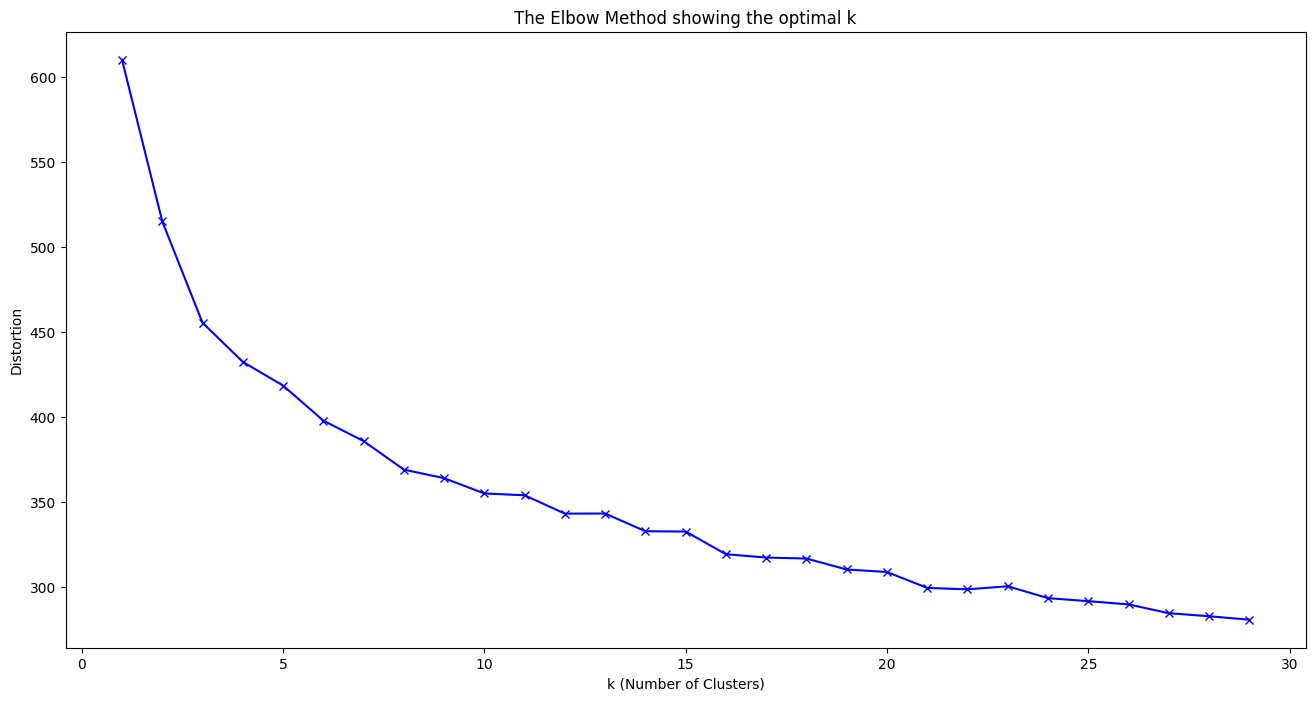

In [68]:
distortions = []
K = range(1, 30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [69]:
# Let's assume the optimal number of clusters is equal to 15
optimal_k = 15
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_3['cluster_label'] = kmeans.fit_predict(X)

data_3.head()

,linkedinProfile,Result,jobTitle,result_new,cluster_label
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,CEO,True,1
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,President and Illustrator,True,5
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,CEO,True,1
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Founder and Principal,True,9
4,https://www.linkedin.com/in/gary-lacourt-811b1874,4.Purchased Event,Founder and CEO,True,11


In [70]:
# We will assign a name to each cluster
def txt_tags(row):
  if row == 0:
     return 'Others'
  if row == 1:
     return 'CEO'
  if row == 2:
     return 'Founder/Co-Founder'
  if row == 3:
     return 'Owner'
  if row == 4:
     return 'Director'
  if row == 5:
     return 'President'
  if row == 6:
     return 'Chief Operating/Marketing Officer'
  if row == 7:
     return 'Managing Partner'
  if row == 8:
     return 'Others'
  if row == 9:
    return 'Principal'
  if row == 10:
    return 'Board Member'
  if row == 11:
    return 'Founder and CEO'
  if row == 12:
    return 'Sales/Account Manager'
  if row == 13:
    return 'Vice President'
  if row == 14:
    return 'Advisor'
    
data_3['job_name'] = data_3['cluster_label'].apply(txt_tags)
data_3.head()

,linkedinProfile,Result,jobTitle,result_new,cluster_label,job_name
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,CEO,True,1,CEO
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,President and Illustrator,True,5,President
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,CEO,True,1,CEO
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Founder and Principal,True,9,Principal
4,https://www.linkedin.com/in/gary-lacourt-811b1874,4.Purchased Event,Founder and CEO,True,11,Founder and CEO


In [71]:
# For each cluster, we calculate the probability of performing targeted actions
all_jobs = data_3.pivot_table(index='job_name',
                               values=['Result', 'result_new'],
                               aggfunc={'Result': 'count', 'result_new': 'mean'}).reset_index()

all_jobs['result_new'] = round(all_jobs['result_new'] * 100, 3)
all_jobs.sort_values(by='result_new', ascending=False)

,job_name,Result,result_new
0,Advisor,10,10.000
2,CEO,33,9.091
11,Principal,12,8.333
13,Vice President,15,6.667
7,Managing Partner,32,6.250
1,Board Member,18,5.556
4,Director,46,4.348
9,Owner,30,3.333
10,President,34,2.941
6,Founder/Co-Founder,120,2.500


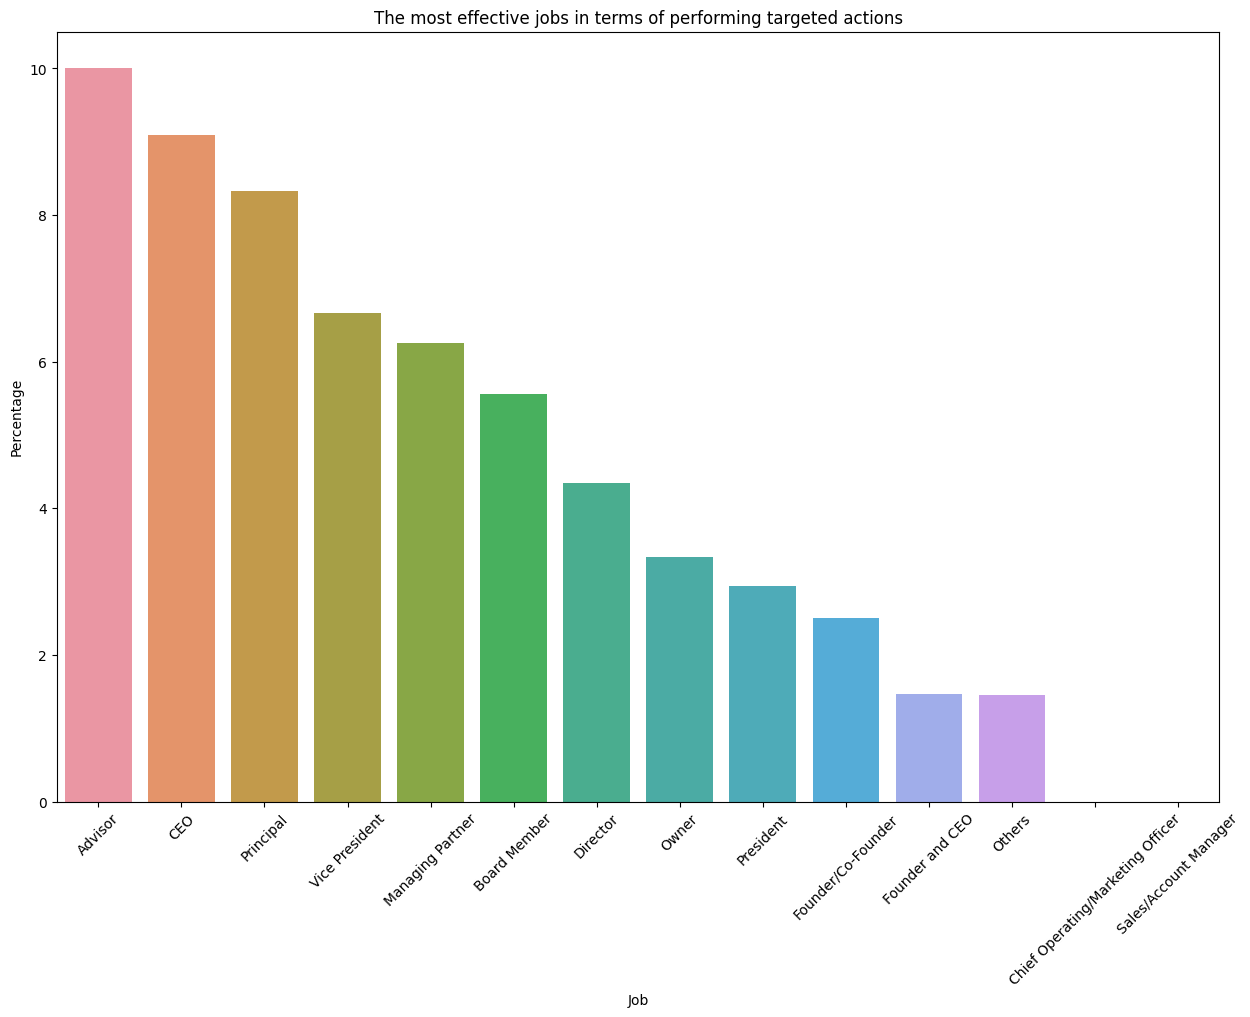

In [72]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="job_name", y="result_new", data=all_jobs.sort_values(by='result_new', ascending=False))
plt.xlabel('Job')
plt.ylabel('Percentage')
plt.title('The most effective jobs in terms of performing targeted actions')
plt.xticks(rotation='45')
plt.show();

**Clients who have ever held the positions of Advisor, CEO, Principal are more likely to commit targeted actions.**

#### Once again, let's look at the relationship between the client's degree and the probability of their performing targeted actions. But this time we will consider not only the last, but also previous degree.

In [73]:
data_1 = data_without[['linkedinProfile', 'Result', 'schoolDegree']]
data_2 = data_without[['linkedinProfile','Result', 'schoolDegree2']]
data_combined_2 = pd.concat([data_1, data_2.rename(columns={'schoolDegree2': 'schoolDegree'})], axis=0, ignore_index=True)
data_combined_2.head()

,linkedinProfile,Result,schoolDegree
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,master
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Bachelor of Science (B.S.)
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Dual MA
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Bachelor of Science - BS
4,https://www.linkedin.com/in/gary-lacourt-811b1874,4.Purchased Event,NaN


In [74]:
data_combined_2['result_new'] = data_combined_2['Result'].apply(process_result)
data_combined_2.head()

,linkedinProfile,Result,schoolDegree,result_new
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,master,True
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Bachelor of Science (B.S.),True
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Dual MA,True
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Bachelor of Science - BS,True
4,https://www.linkedin.com/in/gary-lacourt-811b1874,4.Purchased Event,NaN,True


In [75]:
data_combined_2= data_combined_2.dropna(subset=['schoolDegree'])
texts = data_combined_2['schoolDegree']

In [76]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

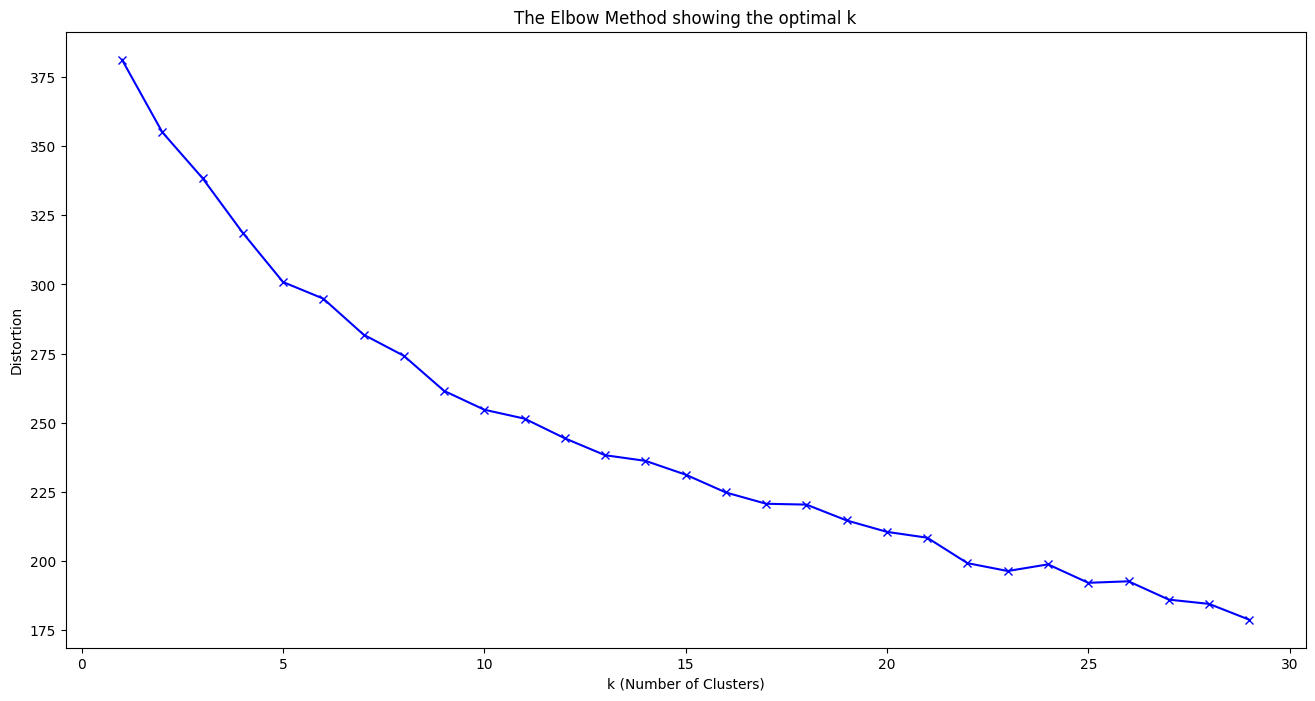

In [77]:
distortions = []
K = range(1, 30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [78]:
optimal_k = 15
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_combined_2['cluster_label'] = kmeans.fit_predict(X)

data_combined_2.head()

,linkedinProfile,Result,schoolDegree,result_new,cluster_label
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,master,True,9
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Bachelor of Science (B.S.),True,6
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Dual MA,True,4
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Bachelor of Science - BS,True,0
6,https://www.linkedin.com/in/whiteandrewdc,4.Purchased Event,Doctor of Chiropractic,True,4


In [79]:
def txt_tags(row):
  if row == 0:
     return 'Bachelor of Science'
  if row == 1:
     return 'Master of Business Administration'
  if row == 2:
     return 'PhD'
  if row == 3:
     return 'Bachelor of Arts'
  if row == 4:
     return 'Others'
  if row == 5:
     return "Bachelor's degree"
  if row == 6:
     return 'Bachelor of Science'
  if row == 7:
     return 'Bachelor of Arts'
  if row == 8:
     return 'Master of Business Administration'
  if row == 9:
    return 'Master of Arts'
  if row == 10:
    return 'Bachelor of Applied Science'
  if row == 11:
    return 'Bachelor of Science'
  if row == 12:
    return 'Master of Science'
  if row == 13:
    return 'Associates Degree'
  if row == 14:
    return 'Others'
    
data_combined_2['degree_name'] = data_combined_2['cluster_label'].apply(txt_tags)
data_combined_2.head()

,linkedinProfile,Result,schoolDegree,result_new,cluster_label,degree_name
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,master,True,9,Master of Arts
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Bachelor of Science (B.S.),True,6,Bachelor of Science
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Dual MA,True,4,Others
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Bachelor of Science - BS,True,0,Bachelor of Science
6,https://www.linkedin.com/in/whiteandrewdc,4.Purchased Event,Doctor of Chiropractic,True,4,Others


In [80]:
all_degrees = data_combined_2.pivot_table(index='degree_name',
                               values=['Result', 'result_new'],
                               aggfunc={'Result': 'count', 'result_new': 'mean'}).reset_index()

all_degrees['result_new'] = round(all_degrees['result_new'] * 100, 3)
all_degrees.sort_values(by='result_new', ascending=False)

,degree_name,Result,result_new
7,Master of Science,7,14.286
5,Master of Arts,12,8.333
3,Bachelor of Science,55,7.273
6,Master of Business Administration,42,4.762
4,Bachelor's degree,25,4.000
8,Others,211,2.844
0,Associates Degree,7,0.000
1,Bachelor of Applied Science,11,0.000
2,Bachelor of Arts,47,0.000
9,PhD,6,0.000


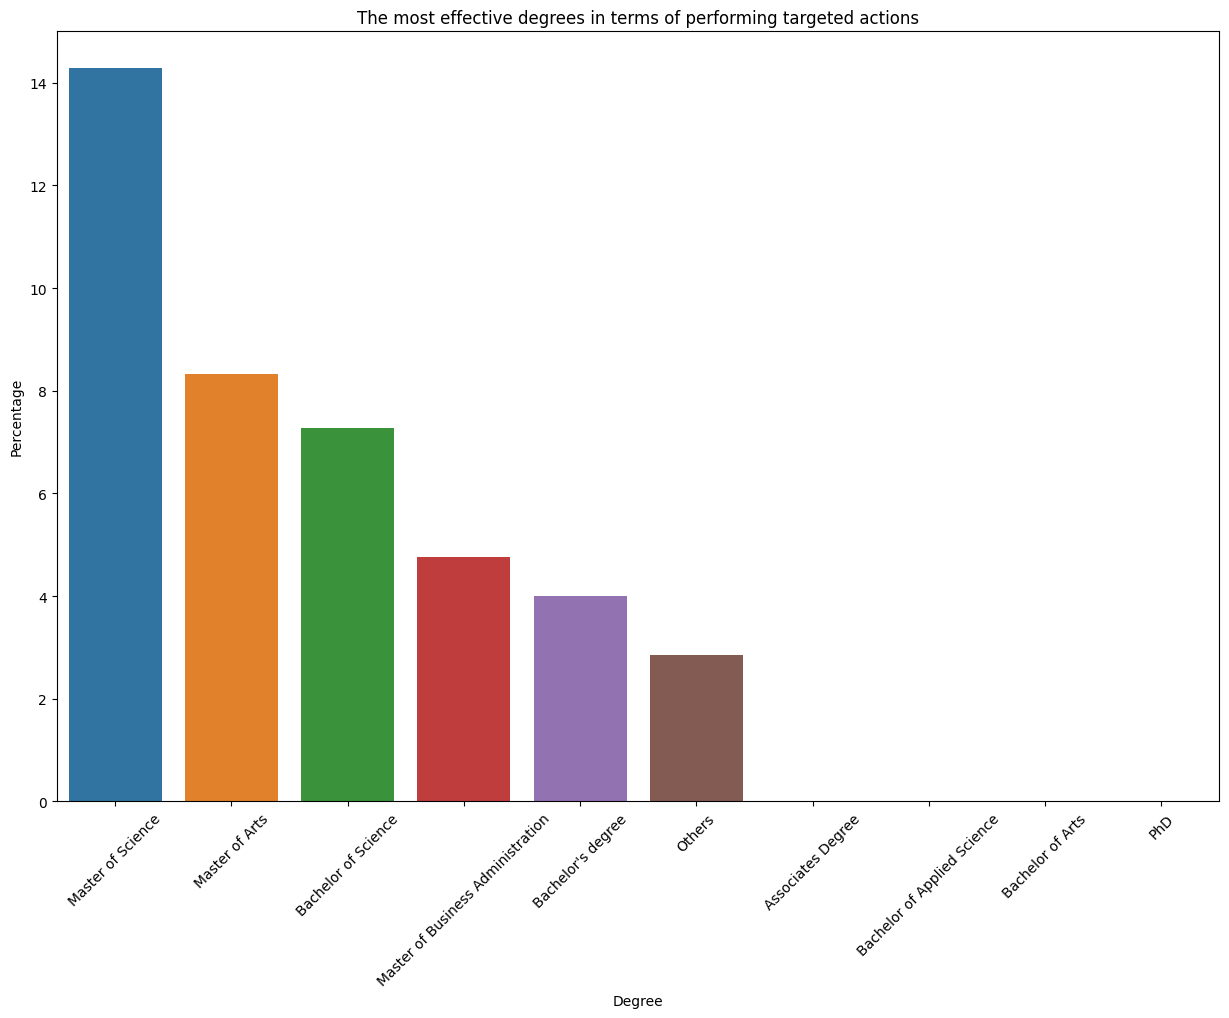

In [81]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="degree_name", y="result_new", data=all_degrees.sort_values(by='result_new', ascending=False))
plt.xlabel('Degree')
plt.ylabel('Percentage')
plt.title('The most effective degrees in terms of performing targeted actions')
plt.xticks(rotation='45')
plt.show();

**Clients who have ever received a Master of Science, Master of Arts, Bachelor of Science degree are more likely to commit targeted actions.**

#### Once again, let's look at the relationship between the client's speciality and the probability of their performing targeted actions. But this time we will consider not only the last, but also previous speciality.

In [82]:
data_1 = data_without[['linkedinProfile', 'Result', 'schoolDegreeSpec']]
data_2 = data_without[['linkedinProfile', 'Result', 'schoolDegreeSpec2']]
data_combined_3 = pd.concat([data_1, data_2.rename(columns={'schoolDegreeSpec2': 'schoolDegreeSpec'})], axis=0, ignore_index=True)
data_combined_3.head()

,linkedinProfile,Result,schoolDegreeSpec
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,marketing
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Architecture
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,"Childhood Education, Special Education"
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Electrical and Electronics Engineering
4,https://www.linkedin.com/in/gary-lacourt-811b1874,4.Purchased Event,NaN


In [83]:
data_combined_3['result_new'] = data_combined_3['Result'].apply(process_result)
data_combined_3.head()

,linkedinProfile,Result,schoolDegreeSpec,result_new
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,marketing,True
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Architecture,True
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,"Childhood Education, Special Education",True
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Electrical and Electronics Engineering,True
4,https://www.linkedin.com/in/gary-lacourt-811b1874,4.Purchased Event,NaN,True


In [84]:
data_combined_3 = data_combined_3.dropna(subset=['schoolDegreeSpec'])
texts = data_combined_3['schoolDegreeSpec']

In [85]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

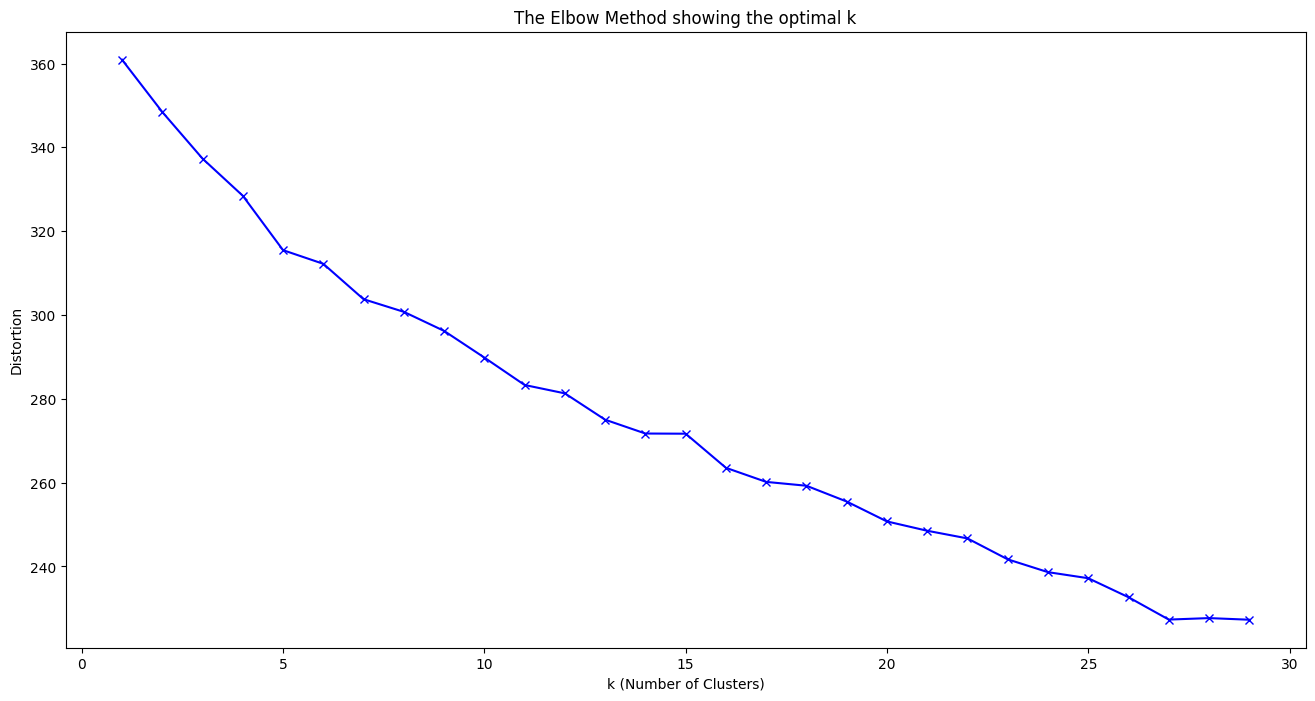

In [86]:
distortions = []
K = range(1, 30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [87]:
optimal_k = 20
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_combined_3['cluster_label'] = kmeans.fit_predict(X)

data_combined_3.head()

,linkedinProfile,Result,schoolDegreeSpec,result_new,cluster_label
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,marketing,True,2
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Architecture,True,1
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,"Childhood Education, Special Education",True,14
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Electrical and Electronics Engineering,True,9
5,https://www.linkedin.com/in/lyle-stoflet-38a07ab8,4.Purchased Event,Engineering,True,9


In [88]:
def txt_tags(row):
  if row == 0:
     return 'Accounting'
  if row == 1:
     return 'Others'
  if row == 2:
     return 'Marketing'
  if row == 3:
     return 'Communications'
  if row == 4:
     return 'Entrepreneurial Studies'
  if row == 5:
     return 'Journalism'
  if row == 6:
     return 'Business Management'
  if row == 7:
     return 'Computer Science and Mathematics'
  if row == 8:
     return 'Political Science'
  if row == 9:
    return 'Engineering'
  if row == 10:
    return 'Others'
  if row == 11:
    return 'Biology and Neuroscience'
  if row == 12:
    return 'Medicine'
  if row == 13:
    return 'Biology and Neuroscience'
  if row == 14:
    return 'Others'
  if row == 15:
    return 'General'
  if row == 16:
    return 'Languages and Literature'
  if row == 17:
    return 'International Business'
  if row == 18:
    return 'Computer Science and Mathematics'
  if row == 19:
    return 'Economics'   
    
data_combined_3['speciality_name'] = data_combined_3['cluster_label'].apply(txt_tags)
data_combined_3.head()

,linkedinProfile,Result,schoolDegreeSpec,result_new,cluster_label,speciality_name
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,marketing,True,2,Marketing
1,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Architecture,True,1,Others
2,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,"Childhood Education, Special Education",True,14,Others
3,https://www.linkedin.com/in/shacharschiff,5. Purchased Membership,Electrical and Electronics Engineering,True,9,Engineering
5,https://www.linkedin.com/in/lyle-stoflet-38a07ab8,4.Purchased Event,Engineering,True,9,Engineering


In [89]:
all_specialities = data_combined_3.pivot_table(index='speciality_name',
                               values=['Result', 'result_new'],
                               aggfunc={'Result': 'count', 'result_new': 'mean'}).reset_index()

all_specialities['result_new'] = round(all_specialities['result_new'] * 100, 3)
all_specialities.sort_values(by='result_new', ascending=False)

,speciality_name,Result,result_new
0,Accounting,5,40.000
10,Journalism,11,18.182
11,Languages and Literature,11,9.091
12,Marketing,24,8.333
13,Medicine,13,7.692
6,Engineering,32,6.250
9,International Business,16,6.250
8,General,20,5.000
14,Others,140,1.429
1,Biology and Neuroscience,8,0.000


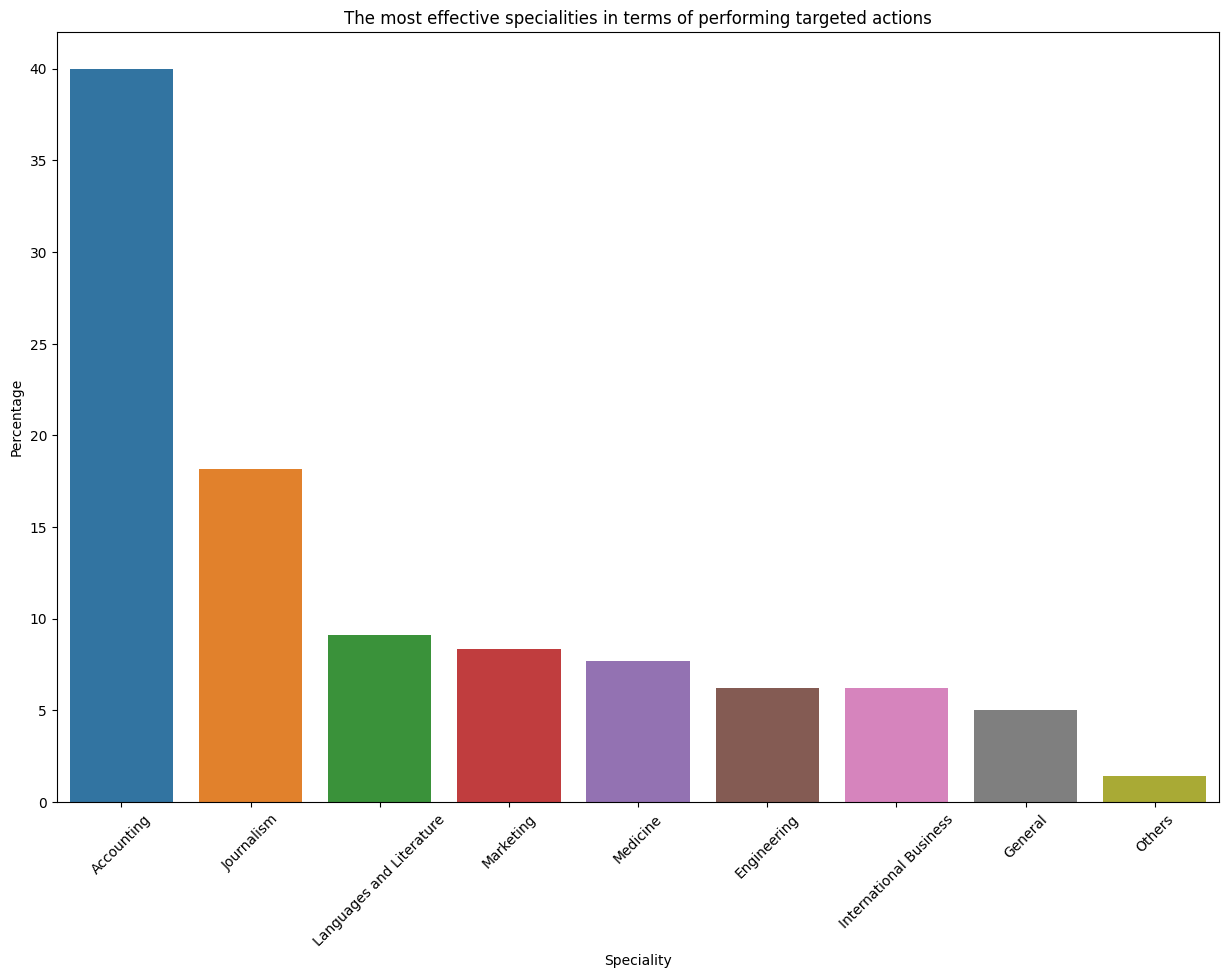

In [90]:
all_specialities = all_specialities.query('result_new > 0')
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="speciality_name", y="result_new", data=all_specialities.sort_values(by='result_new', ascending=False))
plt.xlabel('Speciality')
plt.ylabel('Percentage')
plt.title('The most effective specialities in terms of performing targeted actions')
plt.xticks(rotation='45')
plt.show();

**Clients who have ever studied Accounting and Journalism specialties are more likely to commit targeted actions.**

## General conclusion on both parts of the project
Having combined the data from the first and second parts of the project, I suggest following the following recommendations:
1. The location of the client affects whether he performs the target actions or not. it makes sense to work with clients from the states Michigan, Minnesota, Ohio, Wisconsin in the first place.
2. The position of the client affects whether he performs targeted actions or not. Clients who have ever held the positions of Advisor, CEO, Principal are more likely to commit targeted actions.
3. The speciality of the client affects whether he performs targeted actions or not. Clients who have ever studied Accounting or Journalism specialties are more likely to commit targeted actions.
4. The degree of the client affects whether he performs targeted actions or not.Clients who have ever received a Master of Science, Master of Arts, Bachelor of Science degrees are more likely to commit targeted actions.
5. The working experience of the client affects whether he performs targeted actions or not.We can say that people with working experience from 10 to 15 years and more than 15 years are more likely to commit targeted actions.
6. The gender of the client affects whether he performs targeted actions or not. Only men have performed targeted actions.

## An attempt to solve a problem using machine learning

**Using the Random Forest model, we will analyze which categorical variables have the greatest impact on the target values from the Result column.**

In [91]:
# Install the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [92]:
# Let's leave only the columns we need
data_without_columns = data.drop(['email', 'mailFromDropcontact', 'companyUrl', 'companyUrl2',
                                  'companyUrl', 'schoolUrl', 'schoolUrl2', 'websiteFromDropContact', 'twitter', 'website',
                                  'companyWebsite', 'mail', 'headline', 'fullName',
                                 'mutualConnectionsText', 'schoolDateRange', 'schoolDateRange2',
                                 'jobDateRange', 'jobDateRange2', 'qualificationFromDropContact',
                                 'phoneNumberFromDropContact', 'allSkills', 
                                 'skill1', 'skill2', 'skill3', 'skill4', 'skill5', 'skill6',
                                 'endorsement1', 'endorsement2', 'endorsement3', 'endorsement4', 'endorsement5', 
                                  'endorsement6', 'baseUrl', 'profileId', 'timestamp', 'subscribers', 'userId',
                                  'connectionsCount', 'birthday', 'sirenFromDropContact', 'siretFromDropContact',
                                 'start_job', 'finish_job', 'years_of_experience',
                                 'result_new', 'Unnamed: 72', 'siretZipFromDropContact', 'birthday_date',
                                 'schoolDescription2', 'schoolDescription', 'naf5CodeFromDropContact',
                                 'naf5DesFromDropContact', 'siretAddressFromDropContact',
                                  'vatFromDropContact', 'nbEmployeesFromDropContact',
                                 'Unnamed: 73'], axis=1)


In [93]:
data_without_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   linkedinProfile          348 non-null    object
 1   Result                   348 non-null    object
 2   Other                    191 non-null    object
 3   description              278 non-null    object
 4   location                 348 non-null    object
 5   firstName                348 non-null    object
 6   lastName                 348 non-null    object
 7   company                  346 non-null    object
 8   jobTitle                 347 non-null    object
 9   jobDescription           169 non-null    object
 10  jobLocation              215 non-null    object
 11  company2                 335 non-null    object
 12  jobTitle2                335 non-null    object
 13  jobDescription2          183 non-null    object
 14  school                   328 non-null    o

**Let's add the columns job_name, speciality_name, degree_name to the table, which we received in the second part of the project.**

In [94]:
data_help = data_combined_2[['linkedinProfile', 'degree_name']]
data_help.head()

,linkedinProfile,degree_name
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,Master of Arts
1,https://www.linkedin.com/in/jonbowerman,Bachelor of Science
2,https://www.linkedin.com/in/parkeralynch,Others
3,https://www.linkedin.com/in/shacharschiff,Bachelor of Science
6,https://www.linkedin.com/in/whiteandrewdc,Others


In [95]:
data_new =  data_without_columns.merge(data_help, on='linkedinProfile', how='left')
data_new.head()

,linkedinProfile,Result,Other,description,location,firstName,lastName,company,jobTitle,jobDescription,...,schoolDegree,schoolDegreeSpec,school2,schoolDegree2,schoolDegreeSpec2,civilityFromDropContact,jobLocation2,state,experience,degree_name
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,Mark founded Aeroscena in 2010 with the missio...,"Cleveland, Ohio, United States",Mark,Kohoot,Aeroscena,CEO,Aeroscena develops and markets fragrances from...,...,master,marketing,The Ohio State University,BSBA,International Business,Mr,NaN,Ohio,Work experience from 10 to 15 years,Master of Arts
1,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,Mark founded Aeroscena in 2010 with the missio...,"Cleveland, Ohio, United States",Mark,Kohoot,Aeroscena,CEO,Aeroscena develops and markets fragrances from...,...,master,marketing,The Ohio State University,BSBA,International Business,Mr,NaN,Ohio,Work experience from 10 to 15 years,Others
2,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,A creative problem solver who can rapidly desi...,"Farmington, Michigan, United States",Jon,Bowerman,Kids Draw Bob,President and Illustrator,The energy in a room of children who've found ...,...,Bachelor of Science (B.S.),Architecture,Walled Lake Central High School,High School Diploma,NaN,Mr,"West Bloomfield, MI",Michigan,Work experience up to 5 years,Bachelor of Science
3,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,A creative problem solver who can rapidly desi...,"Farmington, Michigan, United States",Jon,Bowerman,Kids Draw Bob,President and Illustrator,The energy in a room of children who've found ...,...,Bachelor of Science (B.S.),Architecture,Walled Lake Central High School,High School Diploma,NaN,Mr,"West Bloomfield, MI",Michigan,Work experience up to 5 years,Others
4,https://www.linkedin.com/in/parkeralynch,5. Purchased Membership,Hunter,NaN,"Royal Oak, Michigan, United States",Parker,Lynch,HedgeHog Health,CEO,Revolutionizing education technology and welln...,...,Dual MA,"Childhood Education, Special Education",Indiana University Bloomington,Bachelor's degree,"English Language and Literature, General",Mr,Greater Detroit Area,Michigan,Work experience up to 5 years,Others


In [96]:
data_help_2 = data_combined_3[['linkedinProfile', 'speciality_name']]

In [97]:
data_new =  data_new.merge(data_help_2, on='linkedinProfile', how='left')
data_new.head()

,linkedinProfile,Result,Other,description,location,firstName,lastName,company,jobTitle,jobDescription,...,schoolDegreeSpec,school2,schoolDegree2,schoolDegreeSpec2,civilityFromDropContact,jobLocation2,state,experience,degree_name,speciality_name
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,Mark founded Aeroscena in 2010 with the missio...,"Cleveland, Ohio, United States",Mark,Kohoot,Aeroscena,CEO,Aeroscena develops and markets fragrances from...,...,marketing,The Ohio State University,BSBA,International Business,Mr,NaN,Ohio,Work experience from 10 to 15 years,Master of Arts,Marketing
1,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,Mark founded Aeroscena in 2010 with the missio...,"Cleveland, Ohio, United States",Mark,Kohoot,Aeroscena,CEO,Aeroscena develops and markets fragrances from...,...,marketing,The Ohio State University,BSBA,International Business,Mr,NaN,Ohio,Work experience from 10 to 15 years,Master of Arts,International Business
2,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,Mark founded Aeroscena in 2010 with the missio...,"Cleveland, Ohio, United States",Mark,Kohoot,Aeroscena,CEO,Aeroscena develops and markets fragrances from...,...,marketing,The Ohio State University,BSBA,International Business,Mr,NaN,Ohio,Work experience from 10 to 15 years,Others,Marketing
3,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,Mark founded Aeroscena in 2010 with the missio...,"Cleveland, Ohio, United States",Mark,Kohoot,Aeroscena,CEO,Aeroscena develops and markets fragrances from...,...,marketing,The Ohio State University,BSBA,International Business,Mr,NaN,Ohio,Work experience from 10 to 15 years,Others,International Business
4,https://www.linkedin.com/in/jonbowerman,5. Purchased Membership,Hunter,A creative problem solver who can rapidly desi...,"Farmington, Michigan, United States",Jon,Bowerman,Kids Draw Bob,President and Illustrator,The energy in a room of children who've found ...,...,Architecture,Walled Lake Central High School,High School Diploma,NaN,Mr,"West Bloomfield, MI",Michigan,Work experience up to 5 years,Bachelor of Science,Others


In [98]:
data_help_3 = data_3[['linkedinProfile', 'job_name']]

In [99]:
data_new =  data_new.merge(data_help_3, on='linkedinProfile', how='left')
data_new.head()

,linkedinProfile,Result,Other,description,location,firstName,lastName,company,jobTitle,jobDescription,...,school2,schoolDegree2,schoolDegreeSpec2,civilityFromDropContact,jobLocation2,state,experience,degree_name,speciality_name,job_name
0,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,Mark founded Aeroscena in 2010 with the missio...,"Cleveland, Ohio, United States",Mark,Kohoot,Aeroscena,CEO,Aeroscena develops and markets fragrances from...,...,The Ohio State University,BSBA,International Business,Mr,NaN,Ohio,Work experience from 10 to 15 years,Master of Arts,Marketing,CEO
1,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,Mark founded Aeroscena in 2010 with the missio...,"Cleveland, Ohio, United States",Mark,Kohoot,Aeroscena,CEO,Aeroscena develops and markets fragrances from...,...,The Ohio State University,BSBA,International Business,Mr,NaN,Ohio,Work experience from 10 to 15 years,Master of Arts,Marketing,Advisor
2,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,Mark founded Aeroscena in 2010 with the missio...,"Cleveland, Ohio, United States",Mark,Kohoot,Aeroscena,CEO,Aeroscena develops and markets fragrances from...,...,The Ohio State University,BSBA,International Business,Mr,NaN,Ohio,Work experience from 10 to 15 years,Master of Arts,International Business,CEO
3,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,Mark founded Aeroscena in 2010 with the missio...,"Cleveland, Ohio, United States",Mark,Kohoot,Aeroscena,CEO,Aeroscena develops and markets fragrances from...,...,The Ohio State University,BSBA,International Business,Mr,NaN,Ohio,Work experience from 10 to 15 years,Master of Arts,International Business,Advisor
4,https://www.linkedin.com/in/mark-kohoot-96a08b1,5. Purchased Membership,Hunter,Mark founded Aeroscena in 2010 with the missio...,"Cleveland, Ohio, United States",Mark,Kohoot,Aeroscena,CEO,Aeroscena develops and markets fragrances from...,...,The Ohio State University,BSBA,International Business,Mr,NaN,Ohio,Work experience from 10 to 15 years,Others,Marketing,CEO


**We will investigate the effect of the following columns on the target values:**
- 'Other'
- 'company'
- 'company2'
- 'school'
- 'civilityFromDropContact'
- 'school2'  
- 'state'
- 'experience' 
- 'degree_name' 
- 'speciality_name' 
- 'job_name'

In [100]:
# We will leave only the necessary columns
data_for_research = data_new.drop(['linkedinProfile', 'firstName', 'lastName', 'jobDescription',
                                              'jobDescription2', 'jobTitle2', 'jobTitle', 'schoolDegree',
                                              'schoolDegree2', 'schoolDegreeSpec', 'schoolDegreeSpec2', 'description',
                                  'location', 'jobLocation2', 'jobLocation'], axis=1)

In [101]:
data_for_research.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 1501
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Result                   1502 non-null   object
 1   Other                    983 non-null    object
 2   company                  1500 non-null   object
 3   company2                 1486 non-null   object
 4   school                   1467 non-null   object
 5   school2                  1226 non-null   object
 6   civilityFromDropContact  1278 non-null   object
 7   state                    1502 non-null   object
 8   experience               1345 non-null   object
 9   degree_name              1369 non-null   object
 10  speciality_name          1259 non-null   object
 11  job_name                 1501 non-null   object
dtypes: object(12)
memory usage: 152.5+ KB


#### Let's move on to creating a model

In [102]:
# Step 1: Coding categorical features
data_encoded = pd.get_dummies(data_for_research, columns=['Result', 'Other', 'company',
                                                          'company2', 'school', 'school2', 
                                                          'civilityFromDropContact', 'state',
                                                         'experience', 'degree_name', 'speciality_name', 'job_name'])


In [103]:
# Step 2: Data Separation
X = data_encoded.drop(['Result_5. Purchased Membership', 'Result_4.Purchased Event'], axis=1)
y = data_encoded[['Result_5. Purchased Membership', 'Result_4.Purchased Event']]  


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Step 3: Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [106]:
# Step 4: Assessing the importance of the features
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)


In [107]:
# Step 5: Output the results
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances.head(10))


company_Aeroscena                               0.040776
company_HedgeHog Health                         0.038838
company_Fantastic Brands                        0.035802
school2_The Ohio State University               0.034787
company2_Born and Raised Detroit Foundation     0.034683
school_New York University                      0.033676
school_Oklahoma State University                0.031995
company2_AlignWell Chiropractic                 0.030502
school_Audencia Nantes Ecole de Management      0.029703
company2_Cleveland Clinic Wellness Institute    0.029537
dtype: float64


**According to the model, the values from the Others column have the greatest impact on the target actions. Also, when searching for potential clients, you can look at clients from Foothold companies, as well as those who graduated from Montana State University-Bozeman and with work experience experience up to 5 years.**

**In my opinion, you should not rely on the result of this model, since there are very few targeted actions in our table (only 2%, as we found out earlier) and, accordingly, the model did not have enough data to learn correctly.**